In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns

dataset_dir = Path('UCI HAR Dataset')

# Loading Data

## Total Body acceleration

In [2]:
train_total_acc_x = pd.read_csv(dataset_dir/'train/Inertial Signals/total_acc_x_train.txt', 
                          header=None, delim_whitespace=True).values
train_total_acc_y = pd.read_csv(dataset_dir/'train/Inertial Signals/total_acc_y_train.txt', 
                          header=None, delim_whitespace=True).values
train_total_acc_z = pd.read_csv(dataset_dir/'train/Inertial Signals/total_acc_z_train.txt', 
                          header=None, delim_whitespace=True).values

test_total_acc_x = pd.read_csv(dataset_dir/'test/Inertial Signals/total_acc_x_test.txt', 
                          header=None, delim_whitespace=True).values
test_total_acc_y = pd.read_csv(dataset_dir/'test/Inertial Signals/total_acc_y_test.txt', 
                          header=None, delim_whitespace=True).values
test_total_acc_z = pd.read_csv(dataset_dir/'test/Inertial Signals/total_acc_z_test.txt', 
                          header=None, delim_whitespace=True).values

In [3]:
train_total_acc_x.shape

(7352, 128)

In [4]:
test_total_acc_x.shape

(2947, 128)

## Estimated Body acceleration

In [5]:
train_body_acc_x = pd.read_csv(dataset_dir/'train/Inertial Signals/body_acc_x_train.txt', 
                          header=None, delim_whitespace=True).values
train_body_acc_y = pd.read_csv(dataset_dir/'train/Inertial Signals/body_acc_y_train.txt', 
                          header=None, delim_whitespace=True).values
train_body_acc_z = pd.read_csv(dataset_dir/'train/Inertial Signals/body_acc_z_train.txt', 
                          header=None, delim_whitespace=True).values

test_body_acc_x = pd.read_csv(dataset_dir/'test/Inertial Signals/body_acc_x_test.txt', 
                          header=None, delim_whitespace=True).values
test_body_acc_y = pd.read_csv(dataset_dir/'test/Inertial Signals/body_acc_y_test.txt', 
                          header=None, delim_whitespace=True).values
test_body_acc_z = pd.read_csv(dataset_dir/'test/Inertial Signals/body_acc_z_test.txt', 
                          header=None, delim_whitespace=True).values

In [6]:
train_body_acc_x.shape

(7352, 128)

In [7]:
test_body_acc_x.shape

(2947, 128)

## Triaxial Angular velocity from the gyroscope

In [8]:
train_gyro_x = pd.read_csv(dataset_dir/'train/Inertial Signals/body_gyro_x_train.txt', 
                          header=None, delim_whitespace=True).values
train_gyro_y = pd.read_csv(dataset_dir/'train/Inertial Signals/body_gyro_y_train.txt', 
                          header=None, delim_whitespace=True).values
train_gyro_z = pd.read_csv(dataset_dir/'train/Inertial Signals/body_gyro_z_train.txt', 
                          header=None, delim_whitespace=True).values

test_gyro_x = pd.read_csv(dataset_dir/'test/Inertial Signals/body_gyro_x_test.txt', 
                          header=None, delim_whitespace=True).values
test_gyro_y = pd.read_csv(dataset_dir/'test/Inertial Signals/body_gyro_y_test.txt', 
                          header=None, delim_whitespace=True).values
test_gyro_z = pd.read_csv(dataset_dir/'test/Inertial Signals/body_gyro_z_test.txt', 
                          header=None, delim_whitespace=True).values

In [9]:
train_gyro_x.shape

(7352, 128)

In [10]:
test_gyro_x.shape

(2947, 128)

## Engineered features

In [11]:
train_eng = pd.read_csv(dataset_dir/'train/X_train.txt', 
                        header=None, delim_whitespace=True).values

test_eng = pd.read_csv(dataset_dir/'test/X_test.txt', 
                       header=None, delim_whitespace=True).values

In [12]:
train_eng.shape

(7352, 561)

In [13]:
test_eng.shape

(2947, 561)

## Subjects

In [14]:
train_subjects = pd.read_csv(dataset_dir/'train/subject_train.txt', delim_whitespace=True, header=None).values

train_subjects.shape

(7352, 1)

In [15]:
test_subjects = pd.read_csv(dataset_dir/'test/subject_test.txt', delim_whitespace=True, header=None).values

test_subjects.shape

(2947, 1)

## Labels

There are 6 types os activites to be recognized in the dataset:

1. WALKING
2. WALKING_UPSTAIRS
3. WALKING_DOWNSTAIRS
4. SITTING
5. STANDING
6. LAYING

In [16]:
train_labels = pd.read_csv(dataset_dir/'train/y_train.txt', delim_whitespace=True, header=None).values

train_labels.shape

(7352, 1)

In [17]:
test_labels = pd.read_csv(dataset_dir/'test/y_test.txt', delim_whitespace=True, header=None).values

test_labels.shape

(2947, 1)

# 2. Data transformation

The sampled signals will be transformed to a 2D matrix where each column represents a different feature and each row represents the subsequent timestep value of each feature. So, the final array will have indexes representing [sample, timestep, feature].

In [18]:
def group_signals(signals_list):
    signals_set = list()
    for signal in signals_list:
        signals_set.append(signal)
    signals_set = np.dstack(signals_set)
    return signals_set

In [19]:
train_signals = [train_total_acc_x, train_total_acc_y, train_total_acc_z,
                 train_body_acc_x, train_body_acc_y, train_body_acc_z,
                 train_gyro_x, train_gyro_y, train_gyro_z]

train_set_signals = group_signals(train_signals)
train_set_signals.shape

(7352, 128, 9)

In [20]:
test_signals = [test_total_acc_x, test_total_acc_y, test_total_acc_z,
                 test_body_acc_x, test_body_acc_y, test_body_acc_z,
                 test_gyro_x, test_gyro_y, test_gyro_z]
test_set_signals = group_signals(test_signals)
test_set_signals.shape

(2947, 128, 9)

# 3. Model training

## 3.1. Model 1: WiSARD

This model uses Thermometer encoding and the enginnered features to make the prediction.

In [21]:
from thermometer_encoder import ThermometerEncoder
import wisardpkg as wp
from time import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import pickle

def cross_validation_model1(X, y, n_splits=5, addressSize=[50], thermometer_size=[5], bleachingActivated=[True], 
                            thermometer_columns=None):
    grid_search_results = []
    best_params = None
    best_accuracy = -1
    
    if not thermometer_columns:
        thermometer_columns = list(range(X.shape[1]))
    
    param_grid_dict = dict()
    param_grid_dict['thermometer_size'] = thermometer_size
    param_grid_dict['addressSize'] = addressSize
    param_grid_dict['bleachingActivated'] = bleachingActivated
    
    skf = StratifiedKFold(n_splits=n_splits)
    
    param_grid = ParameterGrid(param_grid_dict)
    
    param_grid_combinations = len(list(param_grid))
    n_combs = n_splits * param_grid_combinations
    progress = tqdm(total=n_combs, position=0, leave=True)
    
    for params in param_grid:
        print(params)
        training_time = []
        training_prediction_time = []
        validation_prediction_time = []
        thermometer_time = []
        training_accuracy = []
        validation_accuracy = []
        for train_index, val_index in skf.split(X, y):
            X_train = X[train_index, :]
            y_train = y[train_index]
            y_train_str = [str(l) for l in y_train]
            
            X_val = X[val_index, :]
            y_val = y[val_index]
            y_val_str = [str(l) for l in y_val]
            
            model = wp.Wisard(params['addressSize'], bleachingActivated=params['bleachingActivated'])
            thermometer = ThermometerEncoder(thermometer_columns, n_bits=params['thermometer_size'])
            
            start = time()
            X_train = thermometer.fit_transform(X_train).astype(int).tolist()
            X_val = thermometer.transform(X_val).astype(int).tolist()
            end = time()
            thermometer_time.append(end-start)
            
            start = time()
            model.train(X_train, y_train_str)
            end = time()
            training_time.append(end-start)
            
            start = time()
            pred_train = model.classify(X_train)
            end = time()
            training_prediction_time.append(end-start)
            
            start = time()
            pred_val = model.classify(X_val)
            end = time()
            validation_prediction_time.append(end-start)
            
            training_accuracy.append(accuracy_score(y_train_str, pred_train))
            
            validation_accuracy.append(accuracy_score(y_val_str, pred_val))
            
            progress.update()
        
        cv_result = {'training_time_mean': np.mean(training_time),
                     'training_time_std': np.std(training_time),
                     'training_prediction_time_mean': np.mean(training_prediction_time),
                     'training_prediction_time_std': np.std(training_prediction_time),
                     'validation_prediction_time_mean': np.mean(validation_prediction_time),
                     'validation_prediction_time_std': np.std(validation_prediction_time),
                     'thermometer_time_mean': np.mean(thermometer_time),
                     'thermometer_time_std': np.std(thermometer_time),
                     'training_accuracy_mean': np.mean(training_accuracy),
                     'training_accuracy_std': np.std(training_accuracy),
                     'validation_accuracy_mean': np.mean(validation_accuracy),
                     'validation_accuracy_std': np.std(validation_accuracy)}
        
        cv_result = {**params, **cv_result}
        
        grid_search_results.append(cv_result)
        
        if (cv_result['validation_accuracy_mean'] > best_accuracy):
            best_accuracy = cv_result['validation_accuracy_mean']
            best_params = params
        
        print(f"Train acc. mean: {cv_result['training_accuracy_mean']:.4f} | Validation acc. mean: {cv_result['validation_accuracy_mean']:.4f}\n")
    
    grid_search_results = pd.DataFrame(grid_search_results)
    grid_search_results['rank'] = grid_search_results['validation_accuracy_mean'].rank(ascending=False)
    
    return grid_search_results, best_params

ModuleNotFoundError: No module named 'sklearn'

In [31]:
gs_model1, best_params_model1 = cross_validation_model1(train_eng, train_labels, n_splits=5, addressSize=[10, 20, 30, 40, 50], 
                                                        thermometer_size=[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
                                                        bleachingActivated=[True, False], thermometer_columns=None)

  0%|          | 0/600 [00:00<?, ?it/s]

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 4}


  1%|          | 5/600 [02:43<5:28:07, 33.09s/it]

Train acc. mean: 0.9194 | Validation acc. mean: 0.7961

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 5}


  2%|▏         | 10/600 [05:38<5:16:43, 32.21s/it]

Train acc. mean: 0.9343 | Validation acc. mean: 0.8152

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 6}


  2%|▎         | 15/600 [08:14<4:57:59, 30.56s/it]

Train acc. mean: 0.9328 | Validation acc. mean: 0.8045

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 7}


  3%|▎         | 20/600 [11:02<5:21:40, 33.28s/it]

Train acc. mean: 0.9432 | Validation acc. mean: 0.8225

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 8}


  4%|▍         | 25/600 [15:00<7:12:44, 45.15s/it]

Train acc. mean: 0.9451 | Validation acc. mean: 0.8254

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 9}


  5%|▌         | 30/600 [18:46<6:58:14, 44.02s/it]

Train acc. mean: 0.9549 | Validation acc. mean: 0.8339

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 10}


  6%|▌         | 35/600 [22:43<7:25:40, 47.33s/it]

Train acc. mean: 0.9563 | Validation acc. mean: 0.8343

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 11}


  7%|▋         | 40/600 [27:00<7:53:12, 50.70s/it]

Train acc. mean: 0.9531 | Validation acc. mean: 0.8341

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 12}


  8%|▊         | 45/600 [31:36<8:24:38, 54.56s/it]

Train acc. mean: 0.9542 | Validation acc. mean: 0.8368

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 13}


  8%|▊         | 50/600 [36:46<9:12:05, 60.23s/it]

Train acc. mean: 0.9595 | Validation acc. mean: 0.8339

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 14}


  9%|▉         | 55/600 [42:12<9:44:39, 64.37s/it]

Train acc. mean: 0.9665 | Validation acc. mean: 0.8406

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 15}


 10%|█         | 60/600 [48:07<10:22:14, 69.14s/it]

Train acc. mean: 0.9629 | Validation acc. mean: 0.8385

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 4}


 11%|█         | 65/600 [49:39<4:01:09, 27.05s/it] 

Train acc. mean: 0.8792 | Validation acc. mean: 0.7754

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 5}


 12%|█▏        | 70/600 [51:35<3:29:51, 23.76s/it]

Train acc. mean: 0.9104 | Validation acc. mean: 0.8013

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 6}


 12%|█▎        | 75/600 [53:57<3:59:50, 27.41s/it]

Train acc. mean: 0.9226 | Validation acc. mean: 0.8078

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 7}


 13%|█▎        | 80/600 [56:39<4:33:31, 31.56s/it]

Train acc. mean: 0.9349 | Validation acc. mean: 0.8290

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 8}


 14%|█▍        | 85/600 [59:40<5:03:42, 35.38s/it]

Train acc. mean: 0.9348 | Validation acc. mean: 0.8092

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 9}


 15%|█▌        | 90/600 [1:03:13<5:54:41, 41.73s/it]

Train acc. mean: 0.9393 | Validation acc. mean: 0.8225

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 10}


 16%|█▌        | 95/600 [1:07:02<6:20:57, 45.26s/it]

Train acc. mean: 0.9443 | Validation acc. mean: 0.8292

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 11}


 17%|█▋        | 100/600 [1:11:18<6:59:45, 50.37s/it]

Train acc. mean: 0.9460 | Validation acc. mean: 0.8385

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 12}


 18%|█▊        | 105/600 [1:16:07<7:39:16, 55.67s/it]

Train acc. mean: 0.9502 | Validation acc. mean: 0.8305

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 13}


 18%|█▊        | 110/600 [1:21:08<8:05:48, 59.49s/it]

Train acc. mean: 0.9541 | Validation acc. mean: 0.8388

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 14}


 19%|█▉        | 115/600 [1:26:33<8:36:14, 63.86s/it]

Train acc. mean: 0.9560 | Validation acc. mean: 0.8407

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 15}


 20%|██        | 120/600 [1:32:18<9:05:43, 68.22s/it]

Train acc. mean: 0.9592 | Validation acc. mean: 0.8396

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 4}


 21%|██        | 125/600 [1:33:52<3:30:54, 26.64s/it]

Train acc. mean: 0.9520 | Validation acc. mean: 0.8180

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 5}


 22%|██▏       | 130/600 [1:35:46<3:03:52, 23.47s/it]

Train acc. mean: 0.9603 | Validation acc. mean: 0.8334

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 6}


 22%|██▎       | 135/600 [1:38:01<3:24:37, 26.40s/it]

Train acc. mean: 0.9595 | Validation acc. mean: 0.8298

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 7}


 23%|██▎       | 140/600 [1:40:40<3:57:56, 31.04s/it]

Train acc. mean: 0.9645 | Validation acc. mean: 0.8440

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 8}


 24%|██▍       | 145/600 [1:43:45<4:33:24, 36.05s/it]

Train acc. mean: 0.9702 | Validation acc. mean: 0.8451

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 9}


 25%|██▌       | 150/600 [1:47:09<5:00:10, 40.02s/it]

Train acc. mean: 0.9714 | Validation acc. mean: 0.8554

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 10}


 26%|██▌       | 155/600 [1:50:54<5:27:38, 44.18s/it]

Train acc. mean: 0.9752 | Validation acc. mean: 0.8511

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 11}


 27%|██▋       | 160/600 [1:55:07<6:00:30, 49.16s/it]

Train acc. mean: 0.9775 | Validation acc. mean: 0.8536

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 12}


 28%|██▊       | 165/600 [1:59:35<6:22:54, 52.82s/it]

Train acc. mean: 0.9807 | Validation acc. mean: 0.8619

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 13}


 28%|██▊       | 170/600 [2:04:34<6:59:47, 58.58s/it]

Train acc. mean: 0.9825 | Validation acc. mean: 0.8550

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 14}


 29%|██▉       | 175/600 [2:09:52<7:23:22, 62.59s/it]

Train acc. mean: 0.9837 | Validation acc. mean: 0.8573

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 15}


 30%|███       | 180/600 [2:15:40<7:56:51, 68.12s/it]

Train acc. mean: 0.9842 | Validation acc. mean: 0.8617

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 4}


 31%|███       | 185/600 [2:17:09<3:01:52, 26.29s/it]

Train acc. mean: 0.9403 | Validation acc. mean: 0.8166

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 5}


 32%|███▏      | 190/600 [2:19:03<2:39:10, 23.29s/it]

Train acc. mean: 0.9604 | Validation acc. mean: 0.8301

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 6}


 32%|███▎      | 195/600 [2:21:18<2:58:58, 26.52s/it]

Train acc. mean: 0.9570 | Validation acc. mean: 0.8301

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 7}


 33%|███▎      | 200/600 [2:24:02<3:30:51, 31.63s/it]

Train acc. mean: 0.9661 | Validation acc. mean: 0.8399

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 8}


 34%|███▍      | 205/600 [2:26:58<3:48:02, 34.64s/it]

Train acc. mean: 0.9670 | Validation acc. mean: 0.8481

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 9}


 35%|███▌      | 210/600 [2:30:23<4:18:56, 39.84s/it]

Train acc. mean: 0.9693 | Validation acc. mean: 0.8520

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 10}


 36%|███▌      | 215/600 [2:34:11<4:46:08, 44.59s/it]

Train acc. mean: 0.9733 | Validation acc. mean: 0.8546

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 11}


 37%|███▋      | 220/600 [2:38:20<5:09:42, 48.90s/it]

Train acc. mean: 0.9734 | Validation acc. mean: 0.8494

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 12}


 38%|███▊      | 225/600 [2:42:57<5:45:40, 55.31s/it]

Train acc. mean: 0.9795 | Validation acc. mean: 0.8477

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 13}


 38%|███▊      | 230/600 [2:47:51<5:59:45, 58.34s/it]

Train acc. mean: 0.9792 | Validation acc. mean: 0.8583

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 14}


 39%|███▉      | 235/600 [2:53:10<6:25:39, 63.40s/it]

Train acc. mean: 0.9835 | Validation acc. mean: 0.8532

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 15}


 40%|████      | 240/600 [2:59:19<7:11:46, 71.96s/it]

Train acc. mean: 0.9828 | Validation acc. mean: 0.8618

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 4}


 41%|████      | 245/600 [3:00:48<2:39:47, 27.01s/it]

Train acc. mean: 0.9709 | Validation acc. mean: 0.8436

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 5}


 42%|████▏     | 250/600 [3:02:45<2:22:44, 24.47s/it]

Train acc. mean: 0.9768 | Validation acc. mean: 0.8432

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 6}


 42%|████▎     | 255/600 [3:04:58<2:31:25, 26.34s/it]

Train acc. mean: 0.9802 | Validation acc. mean: 0.8466

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 7}


 43%|████▎     | 260/600 [3:07:37<2:54:04, 30.72s/it]

Train acc. mean: 0.9851 | Validation acc. mean: 0.8483

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 8}


 44%|████▍     | 265/600 [3:10:32<3:11:48, 34.35s/it]

Train acc. mean: 0.9880 | Validation acc. mean: 0.8590

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 9}


 45%|████▌     | 270/600 [3:14:04<3:43:52, 40.71s/it]

Train acc. mean: 0.9888 | Validation acc. mean: 0.8624

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 10}


 46%|████▌     | 275/600 [3:17:49<4:00:00, 44.31s/it]

Train acc. mean: 0.9899 | Validation acc. mean: 0.8572

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 11}


 47%|████▋     | 280/600 [3:21:59<4:20:57, 48.93s/it]

Train acc. mean: 0.9922 | Validation acc. mean: 0.8602

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 12}


 48%|████▊     | 285/600 [3:26:31<4:39:10, 53.18s/it]

Train acc. mean: 0.9920 | Validation acc. mean: 0.8682

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 13}


 48%|████▊     | 290/600 [3:31:26<4:59:37, 57.99s/it]

Train acc. mean: 0.9937 | Validation acc. mean: 0.8672

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 14}


 49%|████▉     | 295/600 [3:36:44<5:16:20, 62.23s/it]

Train acc. mean: 0.9946 | Validation acc. mean: 0.8690

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 15}


 50%|█████     | 300/600 [3:42:28<5:40:47, 68.16s/it]

Train acc. mean: 0.9956 | Validation acc. mean: 0.8716

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 4}


 51%|█████     | 305/600 [3:44:01<2:10:48, 26.61s/it]

Train acc. mean: 0.9609 | Validation acc. mean: 0.8186

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 5}


 52%|█████▏    | 310/600 [3:45:54<1:52:06, 23.19s/it]

Train acc. mean: 0.9785 | Validation acc. mean: 0.8439

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 6}


 52%|█████▎    | 315/600 [3:48:08<2:04:28, 26.21s/it]

Train acc. mean: 0.9768 | Validation acc. mean: 0.8392

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 7}


 53%|█████▎    | 320/600 [3:50:46<2:23:19, 30.71s/it]

Train acc. mean: 0.9839 | Validation acc. mean: 0.8596

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 8}


 54%|█████▍    | 325/600 [3:53:44<2:39:44, 34.85s/it]

Train acc. mean: 0.9877 | Validation acc. mean: 0.8628

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 9}


 55%|█████▌    | 330/600 [3:57:07<2:58:01, 39.56s/it]

Train acc. mean: 0.9881 | Validation acc. mean: 0.8517

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 10}


 56%|█████▌    | 335/600 [4:00:50<3:13:23, 43.79s/it]

Train acc. mean: 0.9905 | Validation acc. mean: 0.8626

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 11}


 57%|█████▋    | 340/600 [4:05:01<3:31:46, 48.87s/it]

Train acc. mean: 0.9902 | Validation acc. mean: 0.8581

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 12}


 57%|█████▊    | 345/600 [4:09:29<3:44:53, 52.92s/it]

Train acc. mean: 0.9914 | Validation acc. mean: 0.8686

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 13}


 58%|█████▊    | 350/600 [4:14:32<4:06:42, 59.21s/it]

Train acc. mean: 0.9943 | Validation acc. mean: 0.8594

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 14}


 59%|█████▉    | 355/600 [4:19:45<4:13:17, 62.03s/it]

Train acc. mean: 0.9933 | Validation acc. mean: 0.8696

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 15}


 60%|██████    | 360/600 [4:25:26<4:28:03, 67.01s/it]

Train acc. mean: 0.9951 | Validation acc. mean: 0.8724

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 4}


 61%|██████    | 365/600 [4:26:55<1:42:24, 26.15s/it]

Train acc. mean: 0.9861 | Validation acc. mean: 0.8445

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 5}


 62%|██████▏   | 370/600 [4:28:47<1:28:28, 23.08s/it]

Train acc. mean: 0.9898 | Validation acc. mean: 0.8498

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 6}


 62%|██████▎   | 375/600 [4:31:02<1:38:34, 26.28s/it]

Train acc. mean: 0.9925 | Validation acc. mean: 0.8500

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 7}


 63%|██████▎   | 380/600 [4:33:43<1:54:31, 31.23s/it]

Train acc. mean: 0.9940 | Validation acc. mean: 0.8595

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 8}


 64%|██████▍   | 385/600 [4:36:38<2:02:57, 34.31s/it]

Train acc. mean: 0.9960 | Validation acc. mean: 0.8587

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 9}


 65%|██████▌   | 390/600 [4:40:01<2:18:23, 39.54s/it]

Train acc. mean: 0.9968 | Validation acc. mean: 0.8708

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 10}


 66%|██████▌   | 395/600 [4:43:52<2:35:19, 45.46s/it]

Train acc. mean: 0.9966 | Validation acc. mean: 0.8663

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 11}


 67%|██████▋   | 400/600 [4:48:00<2:43:00, 48.90s/it]

Train acc. mean: 0.9978 | Validation acc. mean: 0.8658

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 12}


 68%|██████▊   | 405/600 [4:52:29<2:53:28, 53.38s/it]

Train acc. mean: 0.9984 | Validation acc. mean: 0.8770

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 13}


 68%|██████▊   | 410/600 [4:57:23<3:02:52, 57.75s/it]

Train acc. mean: 0.9986 | Validation acc. mean: 0.8739

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 14}


 69%|██████▉   | 415/600 [5:02:40<3:14:02, 62.93s/it]

Train acc. mean: 0.9993 | Validation acc. mean: 0.8751

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 15}


 70%|███████   | 420/600 [5:08:17<3:19:45, 66.59s/it]

Train acc. mean: 0.9990 | Validation acc. mean: 0.8779

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 4}


 71%|███████   | 425/600 [5:09:46<1:15:58, 26.05s/it]

Train acc. mean: 0.9844 | Validation acc. mean: 0.8422

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 5}


 72%|███████▏  | 430/600 [5:11:39<1:05:46, 23.22s/it]

Train acc. mean: 0.9902 | Validation acc. mean: 0.8531

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 6}


 72%|███████▎  | 435/600 [5:14:03<1:14:45, 27.18s/it]

Train acc. mean: 0.9905 | Validation acc. mean: 0.8526

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 7}


 73%|███████▎  | 440/600 [5:16:40<1:22:01, 30.76s/it]

Train acc. mean: 0.9944 | Validation acc. mean: 0.8709

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 8}


 74%|███████▍  | 445/600 [5:19:35<1:28:35, 34.29s/it]

Train acc. mean: 0.9951 | Validation acc. mean: 0.8602

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 9}


 75%|███████▌  | 450/600 [5:23:03<1:41:56, 40.77s/it]

Train acc. mean: 0.9957 | Validation acc. mean: 0.8698

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 10}


 76%|███████▌  | 455/600 [5:26:46<1:46:24, 44.03s/it]

Train acc. mean: 0.9979 | Validation acc. mean: 0.8682

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 11}


 77%|███████▋  | 460/600 [5:30:54<1:53:26, 48.62s/it]

Train acc. mean: 0.9969 | Validation acc. mean: 0.8689

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 12}


 78%|███████▊  | 465/600 [5:35:24<1:58:54, 52.85s/it]

Train acc. mean: 0.9981 | Validation acc. mean: 0.8663

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 13}


 78%|███████▊  | 470/600 [5:40:17<2:05:00, 57.70s/it]

Train acc. mean: 0.9981 | Validation acc. mean: 0.8693

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 14}


 79%|███████▉  | 475/600 [5:45:38<2:10:42, 62.74s/it]

Train acc. mean: 0.9989 | Validation acc. mean: 0.8740

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 15}


 80%|████████  | 480/600 [5:51:15<2:13:17, 66.65s/it]

Train acc. mean: 0.9991 | Validation acc. mean: 0.8738

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 4}


 81%|████████  | 485/600 [5:52:47<51:47, 27.03s/it]  

Train acc. mean: 0.9943 | Validation acc. mean: 0.8459

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 5}


 82%|████████▏ | 490/600 [5:54:39<42:19, 23.08s/it]

Train acc. mean: 0.9961 | Validation acc. mean: 0.8566

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 6}


 82%|████████▎ | 495/600 [5:56:51<45:15, 25.86s/it]

Train acc. mean: 0.9975 | Validation acc. mean: 0.8554

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 7}


 83%|████████▎ | 500/600 [5:59:28<50:44, 30.44s/it]

Train acc. mean: 0.9987 | Validation acc. mean: 0.8689

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 8}


 84%|████████▍ | 505/600 [6:02:23<54:41, 34.54s/it]

Train acc. mean: 0.9990 | Validation acc. mean: 0.8649

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 9}


 85%|████████▌ | 510/600 [6:05:48<59:46, 39.85s/it]

Train acc. mean: 0.9993 | Validation acc. mean: 0.8652

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 10}


 86%|████████▌ | 515/600 [6:09:31<1:02:04, 43.82s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8702

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 11}


 87%|████████▋ | 520/600 [6:13:47<1:06:52, 50.16s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8662

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 12}


 88%|████████▊ | 525/600 [6:18:12<1:05:36, 52.48s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8704

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 13}


 88%|████████▊ | 530/600 [6:23:08<1:08:16, 58.53s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8749

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 14}


 89%|████████▉ | 535/600 [6:28:19<1:06:50, 61.70s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8707

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 15}


 90%|█████████ | 540/600 [6:33:59<1:06:59, 66.99s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8751

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 4}


 91%|█████████ | 545/600 [6:35:27<23:46, 25.94s/it]  

Train acc. mean: 0.9913 | Validation acc. mean: 0.8307

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 5}


 92%|█████████▏| 550/600 [6:37:18<19:05, 22.91s/it]

Train acc. mean: 0.9959 | Validation acc. mean: 0.8444

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 6}


 92%|█████████▎| 555/600 [6:39:30<19:27, 25.94s/it]

Train acc. mean: 0.9969 | Validation acc. mean: 0.8508

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 7}


 93%|█████████▎| 560/600 [6:42:07<20:24, 30.62s/it]

Train acc. mean: 0.9982 | Validation acc. mean: 0.8629

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 8}


 94%|█████████▍| 565/600 [6:45:08<20:11, 34.60s/it]

Train acc. mean: 0.9986 | Validation acc. mean: 0.8606

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 9}


 95%|█████████▌| 570/600 [6:48:29<19:36, 39.22s/it]

Train acc. mean: 0.9990 | Validation acc. mean: 0.8719

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 10}


 96%|█████████▌| 575/600 [6:52:11<18:09, 43.56s/it]

Train acc. mean: 0.9995 | Validation acc. mean: 0.8697

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 11}


 97%|█████████▋| 580/600 [6:56:21<16:07, 48.36s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8719

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 12}


 98%|█████████▊| 585/600 [7:00:44<12:57, 51.84s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8675

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 13}


 98%|█████████▊| 590/600 [7:05:38<09:34, 57.42s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8776

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 14}


 99%|█████████▉| 595/600 [7:10:49<05:06, 61.40s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8785

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 15}


100%|██████████| 600/600 [7:16:31<00:00, 66.71s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8754



In [33]:
best_params_model1

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 14}

In [37]:
gs_model1 = gs_model1.sort_values('rank').reset_index(drop=True)

with open('results/model1_gs_results.pickle', 'wb') as file:
    pickle.dump(gs_model1, file)

gs_model1

,addressSize,bleachingActivated,thermometer_size,training_time_mean,training_time_std,training_prediction_time_mean,training_prediction_time_std,validation_prediction_time_mean,validation_prediction_time_std,thermometer_time_mean,thermometer_time_std,training_accuracy_mean,training_accuracy_std,validation_accuracy_mean,validation_accuracy_std,rank
0,50,False,14,1.050038,0.100483,1.903664,0.107853,0.456213,0.036972,58.300183,0.414570,0.999864,0.000167,0.878538,0.020922,1.0
1,40,True,15,1.155015,0.142177,2.150205,0.087930,0.532353,0.067464,63.016580,0.343022,0.999014,0.000622,0.877860,0.021933,2.0
2,50,False,13,0.937289,0.039164,1.784808,0.125505,0.402436,0.041004,55.275979,1.661058,0.999626,0.000272,0.877587,0.020783,3.0
3,40,True,12,0.957398,0.140268,1.841147,0.225698,0.447434,0.092126,50.234657,0.790068,0.998436,0.000542,0.877042,0.021262,4.0
4,50,False,15,1.101405,0.091224,2.082378,0.122678,0.465581,0.016437,64.311114,3.366207,0.999796,0.000068,0.875410,0.022517,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,False,6,0.513411,0.074930,1.416754,0.224947,0.334889,0.049020,25.804531,0.997018,0.922572,0.004139,0.807810,0.023743,116.0
116,10,True,6,0.617270,0.283715,2.077487,0.666521,0.498939,0.180973,27.451635,2.912010,0.932773,0.004127,0.804545,0.033746,117.0
117,10,False,5,0.364300,0.034734,1.082309,0.083240,0.251343,0.011373,21.075563,0.124358,0.910432,0.015458,0.801282,0.031013,118.0
118,10,True,4,0.699621,0.119526,2.991878,0.238535,0.698589,0.106812,27.613680,1.154062,0.919410,0.011350,0.796112,0.031776,119.0


In [ ]:
with open('results/model1_gs_results.pickle', 'rb') as file:
    gs_model1 = pickle.load(file)

In [41]:
# Preprocessing train_eng, train_labels
y_train_str = [str(l) for l in train_labels]
y_test_str = [str(l) for l in test_labels]

model = wp.Wisard(best_params_model1['addressSize'], bleachingActivated=best_params_model1['bleachingActivated'])
thermometer_columns = list(range(train_eng.shape[1]))
thermometer = ThermometerEncoder(thermometer_columns, n_bits=best_params_model1['thermometer_size'])

X_train = thermometer.fit_transform(train_eng).astype(int).tolist()
X_test = thermometer.transform(test_eng).astype(int).tolist()

# training
model.train(X_train, y_train_str)

pred_train = model.classify(X_train)
pred_test = model.classify(X_test)

training_accuracy = accuracy_score(y_train_str, pred_train)
test_accuracy = accuracy_score(y_test_str, pred_test)

print(f'Training Accuracy: {training_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.9993
Test Accuracy: 0.8924


In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, display_labels=None, normalize='true'):
    if display_labels is None:
        display_labels = np.unique(y_true)
            
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)
    disp.plot(xticks_rotation=90)
    disp.ax_.grid(False)

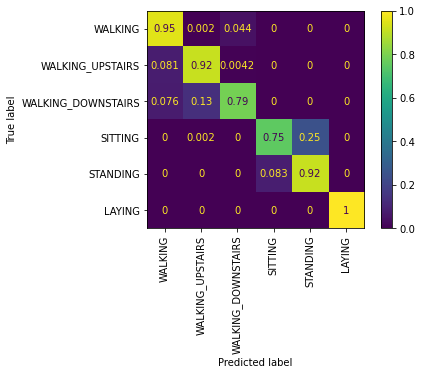

In [60]:
# NOTE: Fill all variables here with default values of the plot_confusion_matrix
display_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
                  'SITTING', 'STANDING', 'LAYING']
plot_confusion_matrix(y_test_str, pred_test, display_labels=display_labels)

## 3.1. Model 1: WiSARD -> second try

This model uses Thermometer encoding and the enginnered features to make the prediction.

In [22]:
from thermometer_encoder import ThermometerEncoder
import wisardpkg as wp
from time import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import pickle

def cross_validation_model1(X, y, n_splits=5, addressSize=[50], thermometer_size=[5], bleachingActivated=[True], 
                            thermometer_columns=None):
    grid_search_results = []
    best_params = None
    best_accuracy = -1
    
    if not thermometer_columns:
        thermometer_columns = list(range(X.shape[1]))
    
    param_grid_dict = dict()
    param_grid_dict['thermometer_size'] = thermometer_size
    param_grid_dict['addressSize'] = addressSize
    param_grid_dict['bleachingActivated'] = bleachingActivated
    
    skf = StratifiedKFold(n_splits=n_splits)
    
    param_grid = ParameterGrid(param_grid_dict)
    
    param_grid_combinations = len(list(param_grid))
    n_combs = n_splits * param_grid_combinations
    progress = tqdm(total=n_combs, position=0, leave=True)
    
    for params in param_grid:
        print(params)
        training_time = []
        training_prediction_time = []
        validation_prediction_time = []
        thermometer_time = []
        training_accuracy = []
        validation_accuracy = []
        for train_index, val_index in skf.split(X, y):
            X_train = X[train_index, :]
            y_train = y[train_index]
            y_train_str = [str(l) for l in y_train]
            
            X_val = X[val_index, :]
            y_val = y[val_index]
            y_val_str = [str(l) for l in y_val]
            
            model = wp.Wisard(params['addressSize'], bleachingActivated=params['bleachingActivated'])
            thermometer = ThermometerEncoder(thermometer_columns, n_bits=params['thermometer_size'])
            
            start = time()
            X_train = thermometer.fit_transform(X_train).astype(int).tolist()
            X_val = thermometer.transform(X_val).astype(int).tolist()
            end = time()
            thermometer_time.append(end-start)
            
            start = time()
            model.train(X_train, y_train_str)
            end = time()
            training_time.append(end-start)
            
            start = time()
            pred_train = model.classify(X_train)
            end = time()
            training_prediction_time.append(end-start)
            
            start = time()
            pred_val = model.classify(X_val)
            end = time()
            validation_prediction_time.append(end-start)
            
            training_accuracy.append(accuracy_score(y_train_str, pred_train))
            
            validation_accuracy.append(accuracy_score(y_val_str, pred_val))
            
            progress.update()
        
        cv_result = {'training_time_mean': np.mean(training_time),
                     'training_time_std': np.std(training_time),
                     'training_prediction_time_mean': np.mean(training_prediction_time),
                     'training_prediction_time_std': np.std(training_prediction_time),
                     'validation_prediction_time_mean': np.mean(validation_prediction_time),
                     'validation_prediction_time_std': np.std(validation_prediction_time),
                     'thermometer_time_mean': np.mean(thermometer_time),
                     'thermometer_time_std': np.std(thermometer_time),
                     'training_accuracy_mean': np.mean(training_accuracy),
                     'training_accuracy_std': np.std(training_accuracy),
                     'validation_accuracy_mean': np.mean(validation_accuracy),
                     'validation_accuracy_std': np.std(validation_accuracy)}
        
        cv_result = {**params, **cv_result}
        
        grid_search_results.append(cv_result)
        
        if (cv_result['validation_accuracy_mean'] > best_accuracy):
            best_accuracy = cv_result['validation_accuracy_mean']
            best_params = params
        
        print(f"Train acc. mean: {cv_result['training_accuracy_mean']:.4f} | Validation acc. mean: {cv_result['validation_accuracy_mean']:.4f}\n")
    
    grid_search_results = pd.DataFrame(grid_search_results)
    grid_search_results['rank'] = grid_search_results['validation_accuracy_mean'].rank(ascending=False)
    
    return grid_search_results, best_params

In [27]:
thermometer_size = list(range(10, 21))
addressSize = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
gs_model1, best_params_model1 = cross_validation_model1(train_eng, train_labels, n_splits=5, addressSize=addressSize, 
                                                        thermometer_size=thermometer_size, 
                                                        bleachingActivated=[True, False], thermometer_columns=None)

  0%|          | 0/1210 [00:00<?, ?it/s]

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 10}


  0%|          | 5/1210 [00:24<1:37:24,  4.85s/it]

Train acc. mean: 0.9561 | Validation acc. mean: 0.8308

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 11}


  1%|          | 10/1210 [00:50<1:42:29,  5.12s/it]

Train acc. mean: 0.9573 | Validation acc. mean: 0.8392

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 12}


  1%|          | 15/1210 [01:17<1:48:57,  5.47s/it]

Train acc. mean: 0.9591 | Validation acc. mean: 0.8346

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 13}


  2%|▏         | 20/1210 [01:46<1:52:44,  5.68s/it]

Train acc. mean: 0.9601 | Validation acc. mean: 0.8350

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 14}


  2%|▏         | 25/1210 [02:19<2:05:38,  6.36s/it]

Train acc. mean: 0.9614 | Validation acc. mean: 0.8385

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 15}


  2%|▏         | 30/1210 [02:53<2:09:59,  6.61s/it]

Train acc. mean: 0.9606 | Validation acc. mean: 0.8392

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 16}


  3%|▎         | 35/1210 [03:29<2:20:51,  7.19s/it]

Train acc. mean: 0.9645 | Validation acc. mean: 0.8396

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 17}


  3%|▎         | 40/1210 [04:06<2:22:15,  7.30s/it]

Train acc. mean: 0.9645 | Validation acc. mean: 0.8356

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 18}


  4%|▎         | 45/1210 [04:46<2:35:05,  7.99s/it]

Train acc. mean: 0.9650 | Validation acc. mean: 0.8391

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 19}


  4%|▍         | 50/1210 [05:32<2:59:31,  9.29s/it]

Train acc. mean: 0.9661 | Validation acc. mean: 0.8453

{'addressSize': 10, 'bleachingActivated': True, 'thermometer_size': 20}


  5%|▍         | 55/1210 [06:20<3:07:44,  9.75s/it]

Train acc. mean: 0.9682 | Validation acc. mean: 0.8413

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 10}


  5%|▍         | 60/1210 [06:41<1:39:24,  5.19s/it]

Train acc. mean: 0.9463 | Validation acc. mean: 0.8199

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 11}


  5%|▌         | 65/1210 [07:06<1:34:10,  4.93s/it]

Train acc. mean: 0.9465 | Validation acc. mean: 0.8251

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 12}


  6%|▌         | 70/1210 [07:33<1:42:10,  5.38s/it]

Train acc. mean: 0.9500 | Validation acc. mean: 0.8274

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 13}


  6%|▌         | 75/1210 [08:01<1:46:52,  5.65s/it]

Train acc. mean: 0.9515 | Validation acc. mean: 0.8357

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 14}


  7%|▋         | 80/1210 [08:32<1:51:02,  5.90s/it]

Train acc. mean: 0.9524 | Validation acc. mean: 0.8406

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 15}


  7%|▋         | 85/1210 [09:06<2:06:21,  6.74s/it]

Train acc. mean: 0.9533 | Validation acc. mean: 0.8350

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 16}


  7%|▋         | 90/1210 [09:42<2:09:34,  6.94s/it]

Train acc. mean: 0.9560 | Validation acc. mean: 0.8369

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 17}


  8%|▊         | 95/1210 [10:20<2:17:55,  7.42s/it]

Train acc. mean: 0.9567 | Validation acc. mean: 0.8343

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 18}


  8%|▊         | 100/1210 [10:59<2:25:03,  7.84s/it]

Train acc. mean: 0.9599 | Validation acc. mean: 0.8398

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 19}


  9%|▊         | 105/1210 [11:40<2:28:02,  8.04s/it]

Train acc. mean: 0.9624 | Validation acc. mean: 0.8392

{'addressSize': 10, 'bleachingActivated': False, 'thermometer_size': 20}


  9%|▉         | 110/1210 [12:21<2:31:21,  8.26s/it]

Train acc. mean: 0.9602 | Validation acc. mean: 0.8313

{'addressSize': 15, 'bleachingActivated': True, 'thermometer_size': 10}


 10%|▉         | 115/1210 [12:42<1:29:11,  4.89s/it]

Train acc. mean: 0.9672 | Validation acc. mean: 0.8415

{'addressSize': 15, 'bleachingActivated': True, 'thermometer_size': 11}


 10%|▉         | 120/1210 [13:05<1:23:54,  4.62s/it]

Train acc. mean: 0.9703 | Validation acc. mean: 0.8467

{'addressSize': 15, 'bleachingActivated': True, 'thermometer_size': 12}


 10%|█         | 125/1210 [13:33<1:33:49,  5.19s/it]

Train acc. mean: 0.9691 | Validation acc. mean: 0.8502

{'addressSize': 15, 'bleachingActivated': True, 'thermometer_size': 13}


 11%|█         | 130/1210 [14:03<1:41:23,  5.63s/it]

Train acc. mean: 0.9735 | Validation acc. mean: 0.8471

{'addressSize': 15, 'bleachingActivated': True, 'thermometer_size': 14}


 11%|█         | 135/1210 [14:32<1:43:08,  5.76s/it]

Train acc. mean: 0.9753 | Validation acc. mean: 0.8542

{'addressSize': 15, 'bleachingActivated': True, 'thermometer_size': 15}


 12%|█▏        | 140/1210 [15:03<1:49:33,  6.14s/it]

Train acc. mean: 0.9748 | Validation acc. mean: 0.8547

{'addressSize': 15, 'bleachingActivated': True, 'thermometer_size': 16}


 12%|█▏        | 145/1210 [15:38<2:02:40,  6.91s/it]

Train acc. mean: 0.9770 | Validation acc. mean: 0.8553

{'addressSize': 15, 'bleachingActivated': True, 'thermometer_size': 17}


 12%|█▏        | 150/1210 [16:14<2:04:54,  7.07s/it]

Train acc. mean: 0.9749 | Validation acc. mean: 0.8504

{'addressSize': 15, 'bleachingActivated': True, 'thermometer_size': 18}


 13%|█▎        | 155/1210 [16:54<2:13:30,  7.59s/it]

Train acc. mean: 0.9762 | Validation acc. mean: 0.8604

{'addressSize': 15, 'bleachingActivated': True, 'thermometer_size': 19}


 13%|█▎        | 160/1210 [17:30<2:09:41,  7.41s/it]

Train acc. mean: 0.9798 | Validation acc. mean: 0.8591

{'addressSize': 15, 'bleachingActivated': True, 'thermometer_size': 20}


 14%|█▎        | 165/1210 [18:12<2:28:38,  8.53s/it]

Train acc. mean: 0.9808 | Validation acc. mean: 0.8530

{'addressSize': 15, 'bleachingActivated': False, 'thermometer_size': 10}


 14%|█▍        | 170/1210 [18:31<1:20:54,  4.67s/it]

Train acc. mean: 0.9624 | Validation acc. mean: 0.8379

{'addressSize': 15, 'bleachingActivated': False, 'thermometer_size': 11}


 14%|█▍        | 175/1210 [18:52<1:12:39,  4.21s/it]

Train acc. mean: 0.9638 | Validation acc. mean: 0.8396

{'addressSize': 15, 'bleachingActivated': False, 'thermometer_size': 12}


 15%|█▍        | 180/1210 [19:17<1:21:07,  4.73s/it]

Train acc. mean: 0.9669 | Validation acc. mean: 0.8391

{'addressSize': 15, 'bleachingActivated': False, 'thermometer_size': 13}


 15%|█▌        | 185/1210 [19:41<1:23:37,  4.90s/it]

Train acc. mean: 0.9659 | Validation acc. mean: 0.8515

{'addressSize': 15, 'bleachingActivated': False, 'thermometer_size': 14}


 16%|█▌        | 190/1210 [20:09<1:32:44,  5.46s/it]

Train acc. mean: 0.9723 | Validation acc. mean: 0.8500

{'addressSize': 15, 'bleachingActivated': False, 'thermometer_size': 15}


 16%|█▌        | 195/1210 [20:38<1:36:51,  5.73s/it]

Train acc. mean: 0.9725 | Validation acc. mean: 0.8487

{'addressSize': 15, 'bleachingActivated': False, 'thermometer_size': 16}


 17%|█▋        | 200/1210 [21:09<1:42:38,  6.10s/it]

Train acc. mean: 0.9744 | Validation acc. mean: 0.8587

{'addressSize': 15, 'bleachingActivated': False, 'thermometer_size': 17}


 17%|█▋        | 205/1210 [21:41<1:46:16,  6.34s/it]

Train acc. mean: 0.9746 | Validation acc. mean: 0.8447

{'addressSize': 15, 'bleachingActivated': False, 'thermometer_size': 18}


 17%|█▋        | 210/1210 [22:16<1:52:14,  6.73s/it]

Train acc. mean: 0.9731 | Validation acc. mean: 0.8557

{'addressSize': 15, 'bleachingActivated': False, 'thermometer_size': 19}


 18%|█▊        | 215/1210 [22:53<2:06:33,  7.63s/it]

Train acc. mean: 0.9750 | Validation acc. mean: 0.8473

{'addressSize': 15, 'bleachingActivated': False, 'thermometer_size': 20}


 18%|█▊        | 220/1210 [23:36<2:14:38,  8.16s/it]

Train acc. mean: 0.9772 | Validation acc. mean: 0.8507

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 10}


 19%|█▊        | 225/1210 [23:54<1:12:08,  4.39s/it]

Train acc. mean: 0.9775 | Validation acc. mean: 0.8526

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 11}


 19%|█▉        | 230/1210 [24:13<1:04:56,  3.98s/it]

Train acc. mean: 0.9779 | Validation acc. mean: 0.8553

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 12}


 19%|█▉        | 235/1210 [24:35<1:08:21,  4.21s/it]

Train acc. mean: 0.9787 | Validation acc. mean: 0.8543

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 13}


 20%|█▉        | 240/1210 [24:58<1:14:35,  4.61s/it]

Train acc. mean: 0.9799 | Validation acc. mean: 0.8536

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 14}


 20%|██        | 245/1210 [25:27<1:35:36,  5.94s/it]

Train acc. mean: 0.9841 | Validation acc. mean: 0.8584

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 15}


 21%|██        | 250/1210 [26:06<1:46:50,  6.68s/it]

Train acc. mean: 0.9848 | Validation acc. mean: 0.8590

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 16}


 21%|██        | 255/1210 [26:35<1:34:48,  5.96s/it]

Train acc. mean: 0.9850 | Validation acc. mean: 0.8596

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 17}


 21%|██▏       | 260/1210 [27:06<1:38:34,  6.23s/it]

Train acc. mean: 0.9866 | Validation acc. mean: 0.8637

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 18}


 22%|██▏       | 265/1210 [27:45<1:56:51,  7.42s/it]

Train acc. mean: 0.9877 | Validation acc. mean: 0.8598

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 19}


 22%|██▏       | 270/1210 [28:20<1:50:10,  7.03s/it]

Train acc. mean: 0.9881 | Validation acc. mean: 0.8662

{'addressSize': 20, 'bleachingActivated': True, 'thermometer_size': 20}


 23%|██▎       | 275/1210 [28:55<1:50:28,  7.09s/it]

Train acc. mean: 0.9875 | Validation acc. mean: 0.8653

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 10}


 23%|██▎       | 280/1210 [29:14<1:05:49,  4.25s/it]

Train acc. mean: 0.9770 | Validation acc. mean: 0.8534

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 11}


 24%|██▎       | 285/1210 [29:34<1:01:53,  4.01s/it]

Train acc. mean: 0.9738 | Validation acc. mean: 0.8534

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 12}


 24%|██▍       | 290/1210 [29:55<1:06:16,  4.32s/it]

Train acc. mean: 0.9773 | Validation acc. mean: 0.8473

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 13}


 24%|██▍       | 295/1210 [30:19<1:12:05,  4.73s/it]

Train acc. mean: 0.9784 | Validation acc. mean: 0.8509

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 14}


 25%|██▍       | 300/1210 [30:45<1:16:14,  5.03s/it]

Train acc. mean: 0.9821 | Validation acc. mean: 0.8614

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 15}


 25%|██▌       | 305/1210 [31:12<1:21:24,  5.40s/it]

Train acc. mean: 0.9824 | Validation acc. mean: 0.8592

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 16}


 26%|██▌       | 310/1210 [31:41<1:25:36,  5.71s/it]

Train acc. mean: 0.9835 | Validation acc. mean: 0.8630

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 17}


 26%|██▌       | 315/1210 [32:12<1:31:07,  6.11s/it]

Train acc. mean: 0.9834 | Validation acc. mean: 0.8599

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 18}


 26%|██▋       | 320/1210 [32:48<1:45:02,  7.08s/it]

Train acc. mean: 0.9848 | Validation acc. mean: 0.8679

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 19}


 27%|██▋       | 325/1210 [33:29<2:02:11,  8.28s/it]

Train acc. mean: 0.9857 | Validation acc. mean: 0.8619

{'addressSize': 20, 'bleachingActivated': False, 'thermometer_size': 20}


 27%|██▋       | 330/1210 [34:08<1:56:25,  7.94s/it]

Train acc. mean: 0.9861 | Validation acc. mean: 0.8572

{'addressSize': 25, 'bleachingActivated': True, 'thermometer_size': 10}


 28%|██▊       | 335/1210 [34:27<1:04:23,  4.42s/it]

Train acc. mean: 0.9860 | Validation acc. mean: 0.8592

{'addressSize': 25, 'bleachingActivated': True, 'thermometer_size': 11}


 28%|██▊       | 340/1210 [34:46<57:34,  3.97s/it]  

Train acc. mean: 0.9865 | Validation acc. mean: 0.8572

{'addressSize': 25, 'bleachingActivated': True, 'thermometer_size': 12}


 29%|██▊       | 345/1210 [35:08<1:02:21,  4.33s/it]

Train acc. mean: 0.9880 | Validation acc. mean: 0.8609

{'addressSize': 25, 'bleachingActivated': True, 'thermometer_size': 13}


 29%|██▉       | 350/1210 [35:33<1:11:55,  5.02s/it]

Train acc. mean: 0.9890 | Validation acc. mean: 0.8591

{'addressSize': 25, 'bleachingActivated': True, 'thermometer_size': 14}


 29%|██▉       | 355/1210 [36:10<1:43:34,  7.27s/it]

Train acc. mean: 0.9884 | Validation acc. mean: 0.8626

{'addressSize': 25, 'bleachingActivated': True, 'thermometer_size': 15}


 30%|██▉       | 360/1210 [36:47<1:44:20,  7.37s/it]

Train acc. mean: 0.9907 | Validation acc. mean: 0.8648

{'addressSize': 25, 'bleachingActivated': True, 'thermometer_size': 16}


 30%|███       | 365/1210 [37:15<1:23:25,  5.92s/it]

Train acc. mean: 0.9919 | Validation acc. mean: 0.8622

{'addressSize': 25, 'bleachingActivated': True, 'thermometer_size': 17}


 31%|███       | 370/1210 [37:46<1:26:19,  6.17s/it]

Train acc. mean: 0.9925 | Validation acc. mean: 0.8628

{'addressSize': 25, 'bleachingActivated': True, 'thermometer_size': 18}


 31%|███       | 375/1210 [38:18<1:26:25,  6.21s/it]

Train acc. mean: 0.9925 | Validation acc. mean: 0.8678

{'addressSize': 25, 'bleachingActivated': True, 'thermometer_size': 19}


 31%|███▏      | 380/1210 [38:53<1:34:29,  6.83s/it]

Train acc. mean: 0.9937 | Validation acc. mean: 0.8641

{'addressSize': 25, 'bleachingActivated': True, 'thermometer_size': 20}


 32%|███▏      | 385/1210 [39:29<1:38:03,  7.13s/it]

Train acc. mean: 0.9938 | Validation acc. mean: 0.8690

{'addressSize': 25, 'bleachingActivated': False, 'thermometer_size': 10}


 32%|███▏      | 390/1210 [39:47<57:27,  4.20s/it]  

Train acc. mean: 0.9834 | Validation acc. mean: 0.8594

{'addressSize': 25, 'bleachingActivated': False, 'thermometer_size': 11}


 33%|███▎      | 395/1210 [40:06<52:23,  3.86s/it]

Train acc. mean: 0.9857 | Validation acc. mean: 0.8549

{'addressSize': 25, 'bleachingActivated': False, 'thermometer_size': 12}


 33%|███▎      | 400/1210 [40:29<59:52,  4.43s/it]

Train acc. mean: 0.9852 | Validation acc. mean: 0.8581

{'addressSize': 25, 'bleachingActivated': False, 'thermometer_size': 13}


 33%|███▎      | 405/1210 [40:51<59:39,  4.45s/it]  

Train acc. mean: 0.9876 | Validation acc. mean: 0.8519

{'addressSize': 25, 'bleachingActivated': False, 'thermometer_size': 14}


 34%|███▍      | 410/1210 [41:16<1:05:06,  4.88s/it]

Train acc. mean: 0.9899 | Validation acc. mean: 0.8617

{'addressSize': 25, 'bleachingActivated': False, 'thermometer_size': 15}


 34%|███▍      | 415/1210 [41:42<1:08:00,  5.13s/it]

Train acc. mean: 0.9898 | Validation acc. mean: 0.8647

{'addressSize': 25, 'bleachingActivated': False, 'thermometer_size': 16}


 35%|███▍      | 420/1210 [42:09<1:10:29,  5.35s/it]

Train acc. mean: 0.9906 | Validation acc. mean: 0.8615

{'addressSize': 25, 'bleachingActivated': False, 'thermometer_size': 17}


 35%|███▌      | 425/1210 [42:40<1:21:05,  6.20s/it]

Train acc. mean: 0.9916 | Validation acc. mean: 0.8648

{'addressSize': 25, 'bleachingActivated': False, 'thermometer_size': 18}


 36%|███▌      | 430/1210 [43:14<1:25:56,  6.61s/it]

Train acc. mean: 0.9906 | Validation acc. mean: 0.8656

{'addressSize': 25, 'bleachingActivated': False, 'thermometer_size': 19}


 36%|███▌      | 435/1210 [43:46<1:23:52,  6.49s/it]

Train acc. mean: 0.9920 | Validation acc. mean: 0.8645

{'addressSize': 25, 'bleachingActivated': False, 'thermometer_size': 20}


 36%|███▋      | 440/1210 [44:20<1:26:39,  6.75s/it]

Train acc. mean: 0.9928 | Validation acc. mean: 0.8647

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 10}


 37%|███▋      | 445/1210 [44:36<49:45,  3.90s/it]  

Train acc. mean: 0.9907 | Validation acc. mean: 0.8600

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 11}


 37%|███▋      | 450/1210 [44:55<46:37,  3.68s/it]

Train acc. mean: 0.9918 | Validation acc. mean: 0.8649

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 12}


 38%|███▊      | 455/1210 [45:15<50:44,  4.03s/it]

Train acc. mean: 0.9923 | Validation acc. mean: 0.8645

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 13}


 38%|███▊      | 460/1210 [45:39<57:00,  4.56s/it]

Train acc. mean: 0.9949 | Validation acc. mean: 0.8697

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 14}


 38%|███▊      | 465/1210 [46:01<56:10,  4.52s/it]

Train acc. mean: 0.9952 | Validation acc. mean: 0.8750

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 15}


 39%|███▉      | 470/1210 [46:26<59:12,  4.80s/it]

Train acc. mean: 0.9955 | Validation acc. mean: 0.8685

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 16}


 39%|███▉      | 475/1210 [46:52<1:02:23,  5.09s/it]

Train acc. mean: 0.9950 | Validation acc. mean: 0.8683

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 17}


 40%|███▉      | 480/1210 [47:19<1:07:13,  5.53s/it]

Train acc. mean: 0.9955 | Validation acc. mean: 0.8727

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 18}


 40%|████      | 485/1210 [47:52<1:16:50,  6.36s/it]

Train acc. mean: 0.9967 | Validation acc. mean: 0.8747

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 19}


 40%|████      | 490/1210 [48:25<1:18:47,  6.57s/it]

Train acc. mean: 0.9973 | Validation acc. mean: 0.8753

{'addressSize': 30, 'bleachingActivated': True, 'thermometer_size': 20}


 41%|████      | 495/1210 [48:59<1:20:21,  6.74s/it]

Train acc. mean: 0.9963 | Validation acc. mean: 0.8700

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 10}


 41%|████▏     | 500/1210 [49:17<47:33,  4.02s/it]  

Train acc. mean: 0.9897 | Validation acc. mean: 0.8640

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 11}


 42%|████▏     | 505/1210 [49:36<45:15,  3.85s/it]

Train acc. mean: 0.9903 | Validation acc. mean: 0.8588

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 12}


 42%|████▏     | 510/1210 [49:57<47:20,  4.06s/it]

Train acc. mean: 0.9923 | Validation acc. mean: 0.8640

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 13}


 43%|████▎     | 515/1210 [50:19<50:21,  4.35s/it]

Train acc. mean: 0.9922 | Validation acc. mean: 0.8670

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 14}


 43%|████▎     | 520/1210 [50:42<53:37,  4.66s/it]

Train acc. mean: 0.9936 | Validation acc. mean: 0.8709

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 15}


 43%|████▎     | 525/1210 [51:07<55:19,  4.85s/it]

Train acc. mean: 0.9953 | Validation acc. mean: 0.8664

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 16}


 44%|████▍     | 530/1210 [51:34<1:00:22,  5.33s/it]

Train acc. mean: 0.9942 | Validation acc. mean: 0.8667

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 17}


 44%|████▍     | 535/1210 [52:02<1:02:18,  5.54s/it]

Train acc. mean: 0.9956 | Validation acc. mean: 0.8730

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 18}


 45%|████▍     | 540/1210 [52:33<1:08:35,  6.14s/it]

Train acc. mean: 0.9958 | Validation acc. mean: 0.8677

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 19}


 45%|████▌     | 545/1210 [53:05<1:10:09,  6.33s/it]

Train acc. mean: 0.9961 | Validation acc. mean: 0.8728

{'addressSize': 30, 'bleachingActivated': False, 'thermometer_size': 20}


 45%|████▌     | 550/1210 [53:38<1:12:35,  6.60s/it]

Train acc. mean: 0.9963 | Validation acc. mean: 0.8653

{'addressSize': 35, 'bleachingActivated': True, 'thermometer_size': 10}


 46%|████▌     | 555/1210 [53:55<42:49,  3.92s/it]  

Train acc. mean: 0.9953 | Validation acc. mean: 0.8659

{'addressSize': 35, 'bleachingActivated': True, 'thermometer_size': 11}


 46%|████▋     | 560/1210 [54:13<40:48,  3.77s/it]

Train acc. mean: 0.9957 | Validation acc. mean: 0.8645

{'addressSize': 35, 'bleachingActivated': True, 'thermometer_size': 12}


 47%|████▋     | 565/1210 [54:33<41:59,  3.91s/it]

Train acc. mean: 0.9964 | Validation acc. mean: 0.8724

{'addressSize': 35, 'bleachingActivated': True, 'thermometer_size': 13}


 47%|████▋     | 570/1210 [54:54<44:29,  4.17s/it]

Train acc. mean: 0.9966 | Validation acc. mean: 0.8720

{'addressSize': 35, 'bleachingActivated': True, 'thermometer_size': 14}


 48%|████▊     | 575/1210 [55:18<48:55,  4.62s/it]

Train acc. mean: 0.9969 | Validation acc. mean: 0.8766

{'addressSize': 35, 'bleachingActivated': True, 'thermometer_size': 15}


 48%|████▊     | 580/1210 [55:48<57:17,  5.46s/it]  

Train acc. mean: 0.9983 | Validation acc. mean: 0.8761

{'addressSize': 35, 'bleachingActivated': True, 'thermometer_size': 16}


 48%|████▊     | 585/1210 [56:13<54:27,  5.23s/it]

Train acc. mean: 0.9981 | Validation acc. mean: 0.8764

{'addressSize': 35, 'bleachingActivated': True, 'thermometer_size': 17}


 49%|████▉     | 590/1210 [56:41<56:46,  5.49s/it]

Train acc. mean: 0.9984 | Validation acc. mean: 0.8833

{'addressSize': 35, 'bleachingActivated': True, 'thermometer_size': 18}


 49%|████▉     | 595/1210 [57:11<59:52,  5.84s/it]

Train acc. mean: 0.9984 | Validation acc. mean: 0.8784

{'addressSize': 35, 'bleachingActivated': True, 'thermometer_size': 19}


 50%|████▉     | 600/1210 [57:42<1:03:14,  6.22s/it]

Train acc. mean: 0.9990 | Validation acc. mean: 0.8755

{'addressSize': 35, 'bleachingActivated': True, 'thermometer_size': 20}


 50%|█████     | 605/1210 [58:15<1:05:43,  6.52s/it]

Train acc. mean: 0.9989 | Validation acc. mean: 0.8730

{'addressSize': 35, 'bleachingActivated': False, 'thermometer_size': 10}


 50%|█████     | 610/1210 [58:34<42:43,  4.27s/it]  

Train acc. mean: 0.9944 | Validation acc. mean: 0.8599

{'addressSize': 35, 'bleachingActivated': False, 'thermometer_size': 11}


 51%|█████     | 615/1210 [58:52<37:20,  3.77s/it]

Train acc. mean: 0.9948 | Validation acc. mean: 0.8659

{'addressSize': 35, 'bleachingActivated': False, 'thermometer_size': 12}


 51%|█████     | 620/1210 [59:12<39:51,  4.05s/it]

Train acc. mean: 0.9954 | Validation acc. mean: 0.8652

{'addressSize': 35, 'bleachingActivated': False, 'thermometer_size': 13}


 52%|█████▏    | 625/1210 [59:36<43:28,  4.46s/it]

Train acc. mean: 0.9965 | Validation acc. mean: 0.8708

{'addressSize': 35, 'bleachingActivated': False, 'thermometer_size': 14}


 52%|█████▏    | 630/1210 [59:58<43:32,  4.50s/it]

Train acc. mean: 0.9964 | Validation acc. mean: 0.8701

{'addressSize': 35, 'bleachingActivated': False, 'thermometer_size': 15}


 52%|█████▏    | 635/1210 [1:00:23<46:33,  4.86s/it]

Train acc. mean: 0.9968 | Validation acc. mean: 0.8798

{'addressSize': 35, 'bleachingActivated': False, 'thermometer_size': 16}


 53%|█████▎    | 640/1210 [1:00:49<48:38,  5.12s/it]

Train acc. mean: 0.9974 | Validation acc. mean: 0.8713

{'addressSize': 35, 'bleachingActivated': False, 'thermometer_size': 17}


 53%|█████▎    | 645/1210 [1:01:17<52:29,  5.57s/it]

Train acc. mean: 0.9980 | Validation acc. mean: 0.8726

{'addressSize': 35, 'bleachingActivated': False, 'thermometer_size': 18}


 54%|█████▎    | 650/1210 [1:01:47<55:02,  5.90s/it]

Train acc. mean: 0.9982 | Validation acc. mean: 0.8762

{'addressSize': 35, 'bleachingActivated': False, 'thermometer_size': 19}


 54%|█████▍    | 655/1210 [1:02:19<59:50,  6.47s/it]

Train acc. mean: 0.9981 | Validation acc. mean: 0.8735

{'addressSize': 35, 'bleachingActivated': False, 'thermometer_size': 20}


 55%|█████▍    | 660/1210 [1:02:52<59:55,  6.54s/it]  

Train acc. mean: 0.9988 | Validation acc. mean: 0.8711

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 10}


 55%|█████▍    | 665/1210 [1:03:09<36:37,  4.03s/it]

Train acc. mean: 0.9975 | Validation acc. mean: 0.8659

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 11}


 55%|█████▌    | 670/1210 [1:03:28<33:39,  3.74s/it]

Train acc. mean: 0.9983 | Validation acc. mean: 0.8708

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 12}


 56%|█████▌    | 675/1210 [1:03:48<35:06,  3.94s/it]

Train acc. mean: 0.9983 | Validation acc. mean: 0.8708

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 13}


 56%|█████▌    | 680/1210 [1:04:09<36:40,  4.15s/it]

Train acc. mean: 0.9985 | Validation acc. mean: 0.8727

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 14}


 57%|█████▋    | 685/1210 [1:04:32<39:18,  4.49s/it]

Train acc. mean: 0.9991 | Validation acc. mean: 0.8755

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 15}


 57%|█████▋    | 690/1210 [1:04:57<41:33,  4.80s/it]

Train acc. mean: 0.9987 | Validation acc. mean: 0.8749

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 16}


 57%|█████▋    | 695/1210 [1:05:24<48:16,  5.62s/it]

Train acc. mean: 0.9992 | Validation acc. mean: 0.8784

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 17}


 58%|█████▊    | 700/1210 [1:05:53<47:44,  5.62s/it]

Train acc. mean: 0.9991 | Validation acc. mean: 0.8757

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 18}


 58%|█████▊    | 705/1210 [1:06:23<50:42,  6.03s/it]

Train acc. mean: 0.9994 | Validation acc. mean: 0.8787

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 19}


 59%|█████▊    | 710/1210 [1:06:55<52:36,  6.31s/it]

Train acc. mean: 0.9995 | Validation acc. mean: 0.8832

{'addressSize': 40, 'bleachingActivated': True, 'thermometer_size': 20}


 59%|█████▉    | 715/1210 [1:07:28<53:17,  6.46s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8806

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 10}


 60%|█████▉    | 720/1210 [1:07:45<31:56,  3.91s/it]

Train acc. mean: 0.9968 | Validation acc. mean: 0.8677

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 11}


 60%|█████▉    | 725/1210 [1:08:04<30:28,  3.77s/it]

Train acc. mean: 0.9975 | Validation acc. mean: 0.8677

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 12}


 60%|██████    | 730/1210 [1:08:25<33:17,  4.16s/it]

Train acc. mean: 0.9983 | Validation acc. mean: 0.8764

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 13}


 61%|██████    | 735/1210 [1:08:47<33:59,  4.29s/it]

Train acc. mean: 0.9979 | Validation acc. mean: 0.8713

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 14}


 61%|██████    | 740/1210 [1:09:09<35:23,  4.52s/it]

Train acc. mean: 0.9985 | Validation acc. mean: 0.8764

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 15}


 62%|██████▏   | 745/1210 [1:09:34<37:40,  4.86s/it]

Train acc. mean: 0.9985 | Validation acc. mean: 0.8821

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 16}


 62%|██████▏   | 750/1210 [1:10:00<39:32,  5.16s/it]

Train acc. mean: 0.9989 | Validation acc. mean: 0.8796

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 17}


 62%|██████▏   | 755/1210 [1:10:29<41:57,  5.53s/it]

Train acc. mean: 0.9992 | Validation acc. mean: 0.8755

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 18}


 63%|██████▎   | 760/1210 [1:10:59<46:00,  6.13s/it]

Train acc. mean: 0.9990 | Validation acc. mean: 0.8753

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 19}


 63%|██████▎   | 765/1210 [1:11:33<49:10,  6.63s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8796

{'addressSize': 40, 'bleachingActivated': False, 'thermometer_size': 20}


 64%|██████▎   | 770/1210 [1:12:08<50:22,  6.87s/it]

Train acc. mean: 0.9995 | Validation acc. mean: 0.8818

{'addressSize': 45, 'bleachingActivated': True, 'thermometer_size': 10}


 64%|██████▍   | 775/1210 [1:12:26<30:04,  4.15s/it]

Train acc. mean: 0.9987 | Validation acc. mean: 0.8662

{'addressSize': 45, 'bleachingActivated': True, 'thermometer_size': 11}


 64%|██████▍   | 780/1210 [1:12:45<28:12,  3.94s/it]

Train acc. mean: 0.9991 | Validation acc. mean: 0.8659

{'addressSize': 45, 'bleachingActivated': True, 'thermometer_size': 12}


 65%|██████▍   | 785/1210 [1:13:07<29:44,  4.20s/it]

Train acc. mean: 0.9992 | Validation acc. mean: 0.8740

{'addressSize': 45, 'bleachingActivated': True, 'thermometer_size': 13}


 65%|██████▌   | 790/1210 [1:13:30<31:58,  4.57s/it]

Train acc. mean: 0.9995 | Validation acc. mean: 0.8742

{'addressSize': 45, 'bleachingActivated': True, 'thermometer_size': 14}


 66%|██████▌   | 795/1210 [1:13:55<33:03,  4.78s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8758

{'addressSize': 45, 'bleachingActivated': True, 'thermometer_size': 15}


 66%|██████▌   | 800/1210 [1:14:20<34:58,  5.12s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8742

{'addressSize': 45, 'bleachingActivated': True, 'thermometer_size': 16}


 67%|██████▋   | 805/1210 [1:14:48<36:58,  5.48s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8768

{'addressSize': 45, 'bleachingActivated': True, 'thermometer_size': 17}


 67%|██████▋   | 810/1210 [1:15:17<38:55,  5.84s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8730

{'addressSize': 45, 'bleachingActivated': True, 'thermometer_size': 18}


 67%|██████▋   | 815/1210 [1:15:51<41:53,  6.36s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8792

{'addressSize': 45, 'bleachingActivated': True, 'thermometer_size': 19}


 68%|██████▊   | 820/1210 [1:16:23<42:34,  6.55s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8847

{'addressSize': 45, 'bleachingActivated': True, 'thermometer_size': 20}


 68%|██████▊   | 825/1210 [1:16:57<42:56,  6.69s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8764

{'addressSize': 45, 'bleachingActivated': False, 'thermometer_size': 10}


 69%|██████▊   | 830/1210 [1:17:15<25:46,  4.07s/it]

Train acc. mean: 0.9988 | Validation acc. mean: 0.8664

{'addressSize': 45, 'bleachingActivated': False, 'thermometer_size': 11}


 69%|██████▉   | 835/1210 [1:17:35<24:43,  3.96s/it]

Train acc. mean: 0.9988 | Validation acc. mean: 0.8679

{'addressSize': 45, 'bleachingActivated': False, 'thermometer_size': 12}


 69%|██████▉   | 840/1210 [1:17:57<26:22,  4.28s/it]

Train acc. mean: 0.9990 | Validation acc. mean: 0.8692

{'addressSize': 45, 'bleachingActivated': False, 'thermometer_size': 13}


 70%|██████▉   | 845/1210 [1:18:19<27:27,  4.51s/it]

Train acc. mean: 0.9994 | Validation acc. mean: 0.8730

{'addressSize': 45, 'bleachingActivated': False, 'thermometer_size': 14}


 70%|███████   | 850/1210 [1:18:43<28:40,  4.78s/it]

Train acc. mean: 0.9993 | Validation acc. mean: 0.8745

{'addressSize': 45, 'bleachingActivated': False, 'thermometer_size': 15}


 71%|███████   | 855/1210 [1:19:09<29:31,  4.99s/it]

Train acc. mean: 0.9995 | Validation acc. mean: 0.8768

{'addressSize': 45, 'bleachingActivated': False, 'thermometer_size': 16}


 71%|███████   | 860/1210 [1:19:36<31:38,  5.42s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8828

{'addressSize': 45, 'bleachingActivated': False, 'thermometer_size': 17}


 71%|███████▏  | 865/1210 [1:20:06<33:20,  5.80s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8784

{'addressSize': 45, 'bleachingActivated': False, 'thermometer_size': 18}


 72%|███████▏  | 870/1210 [1:20:37<35:03,  6.19s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8857

{'addressSize': 45, 'bleachingActivated': False, 'thermometer_size': 19}


 72%|███████▏  | 875/1210 [1:21:10<36:10,  6.48s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8807

{'addressSize': 45, 'bleachingActivated': False, 'thermometer_size': 20}


 73%|███████▎  | 880/1210 [1:21:45<37:43,  6.86s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8747

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 10}


 73%|███████▎  | 885/1210 [1:22:03<22:35,  4.17s/it]

Train acc. mean: 0.9993 | Validation acc. mean: 0.8700

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 11}


 74%|███████▎  | 890/1210 [1:22:22<20:50,  3.91s/it]

Train acc. mean: 0.9994 | Validation acc. mean: 0.8685

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 12}


 74%|███████▍  | 895/1210 [1:22:43<21:49,  4.16s/it]

Train acc. mean: 0.9994 | Validation acc. mean: 0.8757

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 13}


 74%|███████▍  | 900/1210 [1:23:05<22:34,  4.37s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8746

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 14}


 75%|███████▍  | 905/1210 [1:23:29<23:53,  4.70s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8736

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 15}


 75%|███████▌  | 910/1210 [1:23:55<25:06,  5.02s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8799

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 16}


 76%|███████▌  | 915/1210 [1:24:22<26:46,  5.45s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8716

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 17}


 76%|███████▌  | 920/1210 [1:24:51<27:39,  5.72s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8829

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 18}


 76%|███████▋  | 925/1210 [1:25:23<30:30,  6.42s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8727

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 19}


 77%|███████▋  | 930/1210 [1:26:00<31:55,  6.84s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8803

{'addressSize': 50, 'bleachingActivated': True, 'thermometer_size': 20}


 77%|███████▋  | 935/1210 [1:26:33<30:52,  6.74s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8774

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 10}


 78%|███████▊  | 940/1210 [1:26:51<18:25,  4.10s/it]

Train acc. mean: 0.9994 | Validation acc. mean: 0.8674

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 11}


 78%|███████▊  | 945/1210 [1:27:11<17:03,  3.86s/it]

Train acc. mean: 0.9994 | Validation acc. mean: 0.8711

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 12}


 79%|███████▊  | 950/1210 [1:27:32<18:17,  4.22s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8678

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 13}


 79%|███████▉  | 955/1210 [1:27:54<18:51,  4.44s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8705

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 14}


 79%|███████▉  | 960/1210 [1:28:20<21:41,  5.21s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8739

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 15}


 80%|███████▉  | 965/1210 [1:28:47<21:21,  5.23s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8692

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 16}


 80%|████████  | 970/1210 [1:29:14<21:27,  5.37s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8730

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 17}


 81%|████████  | 975/1210 [1:29:43<22:25,  5.72s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8784

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 18}


 81%|████████  | 980/1210 [1:30:14<23:26,  6.12s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8709

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 19}


 81%|████████▏ | 985/1210 [1:30:46<24:03,  6.41s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8773

{'addressSize': 50, 'bleachingActivated': False, 'thermometer_size': 20}


 82%|████████▏ | 990/1210 [1:31:20<24:53,  6.79s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8802

{'addressSize': 55, 'bleachingActivated': True, 'thermometer_size': 10}


 82%|████████▏ | 995/1210 [1:31:38<14:31,  4.06s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8614

{'addressSize': 55, 'bleachingActivated': True, 'thermometer_size': 11}


 83%|████████▎ | 1000/1210 [1:31:57<13:28,  3.85s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8614

{'addressSize': 55, 'bleachingActivated': True, 'thermometer_size': 12}


 83%|████████▎ | 1005/1210 [1:32:18<14:01,  4.10s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8739

{'addressSize': 55, 'bleachingActivated': True, 'thermometer_size': 13}


 83%|████████▎ | 1010/1210 [1:32:43<15:33,  4.67s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8751

{'addressSize': 55, 'bleachingActivated': True, 'thermometer_size': 14}


 84%|████████▍ | 1015/1210 [1:33:06<15:17,  4.70s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8697

{'addressSize': 55, 'bleachingActivated': True, 'thermometer_size': 15}


 84%|████████▍ | 1020/1210 [1:33:32<16:03,  5.07s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8727

{'addressSize': 55, 'bleachingActivated': True, 'thermometer_size': 16}


 85%|████████▍ | 1025/1210 [1:33:59<16:39,  5.40s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8787

{'addressSize': 55, 'bleachingActivated': True, 'thermometer_size': 17}


 85%|████████▌ | 1030/1210 [1:34:27<17:05,  5.70s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8762

{'addressSize': 55, 'bleachingActivated': True, 'thermometer_size': 18}


 86%|████████▌ | 1035/1210 [1:34:58<17:28,  5.99s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8788

{'addressSize': 55, 'bleachingActivated': True, 'thermometer_size': 19}


 86%|████████▌ | 1040/1210 [1:35:32<19:35,  6.92s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8766

{'addressSize': 55, 'bleachingActivated': True, 'thermometer_size': 20}


 86%|████████▋ | 1045/1210 [1:36:05<18:27,  6.71s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8834

{'addressSize': 55, 'bleachingActivated': False, 'thermometer_size': 10}


 87%|████████▋ | 1050/1210 [1:36:23<10:43,  4.02s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8579

{'addressSize': 55, 'bleachingActivated': False, 'thermometer_size': 11}


 87%|████████▋ | 1055/1210 [1:36:42<09:58,  3.86s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8664

{'addressSize': 55, 'bleachingActivated': False, 'thermometer_size': 12}


 88%|████████▊ | 1060/1210 [1:37:03<10:20,  4.13s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8708

{'addressSize': 55, 'bleachingActivated': False, 'thermometer_size': 13}


 88%|████████▊ | 1065/1210 [1:37:26<11:18,  4.68s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8711

{'addressSize': 55, 'bleachingActivated': False, 'thermometer_size': 14}


 88%|████████▊ | 1070/1210 [1:37:52<11:20,  4.86s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8712

{'addressSize': 55, 'bleachingActivated': False, 'thermometer_size': 15}


 89%|████████▉ | 1075/1210 [1:38:17<11:28,  5.10s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8766

{'addressSize': 55, 'bleachingActivated': False, 'thermometer_size': 16}


 89%|████████▉ | 1080/1210 [1:38:45<11:39,  5.38s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8783

{'addressSize': 55, 'bleachingActivated': False, 'thermometer_size': 17}


 90%|████████▉ | 1085/1210 [1:39:13<11:36,  5.57s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8730

{'addressSize': 55, 'bleachingActivated': False, 'thermometer_size': 18}


 90%|█████████ | 1090/1210 [1:39:43<12:04,  6.04s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8783

{'addressSize': 55, 'bleachingActivated': False, 'thermometer_size': 19}


 90%|█████████ | 1095/1210 [1:40:15<12:02,  6.28s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8757

{'addressSize': 55, 'bleachingActivated': False, 'thermometer_size': 20}


 91%|█████████ | 1100/1210 [1:40:50<12:30,  6.82s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8787

{'addressSize': 60, 'bleachingActivated': True, 'thermometer_size': 10}


 91%|█████████▏| 1105/1210 [1:41:07<07:04,  4.04s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8655

{'addressSize': 60, 'bleachingActivated': True, 'thermometer_size': 11}


 92%|█████████▏| 1110/1210 [1:41:26<06:24,  3.84s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8648

{'addressSize': 60, 'bleachingActivated': True, 'thermometer_size': 12}


 92%|█████████▏| 1115/1210 [1:41:47<06:30,  4.11s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8707

{'addressSize': 60, 'bleachingActivated': True, 'thermometer_size': 13}


 93%|█████████▎| 1120/1210 [1:42:08<06:21,  4.24s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8692

{'addressSize': 60, 'bleachingActivated': True, 'thermometer_size': 14}


 93%|█████████▎| 1125/1210 [1:42:33<06:51,  4.84s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8698

{'addressSize': 60, 'bleachingActivated': True, 'thermometer_size': 15}


 93%|█████████▎| 1130/1210 [1:43:01<07:11,  5.39s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8772

{'addressSize': 60, 'bleachingActivated': True, 'thermometer_size': 16}


 94%|█████████▍| 1135/1210 [1:43:28<06:45,  5.40s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8734

{'addressSize': 60, 'bleachingActivated': True, 'thermometer_size': 17}


 94%|█████████▍| 1140/1210 [1:43:57<06:38,  5.70s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8739

{'addressSize': 60, 'bleachingActivated': True, 'thermometer_size': 18}


 95%|█████████▍| 1145/1210 [1:44:27<06:29,  5.98s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8736

{'addressSize': 60, 'bleachingActivated': True, 'thermometer_size': 19}


 95%|█████████▌| 1150/1210 [1:44:59<06:11,  6.20s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8735

{'addressSize': 60, 'bleachingActivated': True, 'thermometer_size': 20}


 95%|█████████▌| 1155/1210 [1:45:34<06:32,  7.14s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8768

{'addressSize': 60, 'bleachingActivated': False, 'thermometer_size': 10}


 96%|█████████▌| 1160/1210 [1:45:52<03:25,  4.10s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8611

{'addressSize': 60, 'bleachingActivated': False, 'thermometer_size': 11}


 96%|█████████▋| 1165/1210 [1:46:11<02:52,  3.84s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8634

{'addressSize': 60, 'bleachingActivated': False, 'thermometer_size': 12}


 97%|█████████▋| 1170/1210 [1:46:31<02:44,  4.12s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8641

{'addressSize': 60, 'bleachingActivated': False, 'thermometer_size': 13}


 97%|█████████▋| 1175/1210 [1:46:53<02:29,  4.28s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8701

{'addressSize': 60, 'bleachingActivated': False, 'thermometer_size': 14}


 98%|█████████▊| 1180/1210 [1:47:16<02:18,  4.62s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8674

{'addressSize': 60, 'bleachingActivated': False, 'thermometer_size': 15}


 98%|█████████▊| 1185/1210 [1:47:42<02:03,  4.94s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8753

{'addressSize': 60, 'bleachingActivated': False, 'thermometer_size': 16}


 98%|█████████▊| 1190/1210 [1:48:08<01:44,  5.23s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8692

{'addressSize': 60, 'bleachingActivated': False, 'thermometer_size': 17}


 99%|█████████▉| 1195/1210 [1:48:37<01:25,  5.69s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8715

{'addressSize': 60, 'bleachingActivated': False, 'thermometer_size': 18}


 99%|█████████▉| 1200/1210 [1:49:07<00:59,  5.92s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8755

{'addressSize': 60, 'bleachingActivated': False, 'thermometer_size': 19}


100%|█████████▉| 1205/1210 [1:49:38<00:31,  6.30s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8779

{'addressSize': 60, 'bleachingActivated': False, 'thermometer_size': 20}


100%|██████████| 1210/1210 [1:50:12<00:00,  6.61s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8760



In [29]:
with open('results/model1_best_params.pickle', 'wb') as file:
    pickle.dump(best_params_model1, file)
    
best_params_model1

{'addressSize': 45, 'bleachingActivated': False, 'thermometer_size': 18}

In [30]:
gs_model1 = gs_model1.sort_values('rank').reset_index(drop=True)

with open('results/model1_gs_results.pickle', 'wb') as file:
    pickle.dump(gs_model1, file)

gs_model1

,addressSize,bleachingActivated,thermometer_size,training_time_mean,training_time_std,training_prediction_time_mean,training_prediction_time_std,validation_prediction_time_mean,validation_prediction_time_std,thermometer_time_mean,thermometer_time_std,training_accuracy_mean,training_accuracy_std,validation_accuracy_mean,validation_accuracy_std,rank
0,45,False,18,1.225517,0.089208,2.333161,0.053343,0.586855,0.050319,1.572608,0.066230,0.999694,0.000226,0.885747,0.021236,1.0
1,45,True,19,1.259250,0.025381,2.445298,0.075012,0.601988,0.027717,1.713403,0.207054,0.999796,0.000250,0.884659,0.020125,2.0
2,55,True,20,1.325044,0.061048,2.436110,0.087003,0.593997,0.012516,1.713235,0.092957,1.000000,0.000000,0.883437,0.025523,3.0
3,35,True,17,1.025265,0.021363,2.173602,0.077456,0.526612,0.038970,1.357173,0.090787,0.998368,0.000595,0.883299,0.027270,4.0
4,40,True,19,1.258255,0.086636,2.443665,0.108534,0.604597,0.041793,1.562037,0.115836,0.999490,0.000152,0.883163,0.024552,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,10,False,20,1.273177,0.036355,4.019080,0.153743,0.941500,0.013266,1.528330,0.029963,0.960181,0.003993,0.831340,0.026313,238.0
238,10,True,10,0.648478,0.082116,2.290786,0.589359,0.556837,0.107717,0.961680,0.124471,0.956100,0.003509,0.830798,0.036832,239.0
239,10,False,12,0.890166,0.105504,2.353353,0.089519,0.558783,0.028337,1.161834,0.110881,0.950048,0.005877,0.827392,0.024236,240.0
240,10,False,11,0.751850,0.081065,2.144676,0.222388,0.534587,0.050433,1.131117,0.234646,0.946511,0.005633,0.825084,0.024401,241.0


In [34]:
with open('results/model1_gs_results.pickle', 'rb') as file:
    gs_model1 = pickle.load(file)

In [35]:
with open('results/model1_best_params.pickle', 'rb') as file:
    best_params_model1 = pickle.load(file)

In [31]:
# Preprocessing train_eng, train_labels
y_train_str = [str(l) for l in train_labels]
y_test_str = [str(l) for l in test_labels]

model = wp.Wisard(best_params_model1['addressSize'], bleachingActivated=best_params_model1['bleachingActivated'])
thermometer_columns = list(range(train_eng.shape[1]))
thermometer = ThermometerEncoder(thermometer_columns, n_bits=best_params_model1['thermometer_size'])

X_train = thermometer.fit_transform(train_eng).astype(int).tolist()
X_test = thermometer.transform(test_eng).astype(int).tolist()

# training
model.train(X_train, y_train_str)

pred_train = model.classify(X_train)
pred_test = model.classify(X_test)

training_accuracy = accuracy_score(y_train_str, pred_train)
test_accuracy = accuracy_score(y_test_str, pred_test)

print(f'Training Accuracy: {training_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.9997
Test Accuracy: 0.9043


In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, display_labels=None, normalize='true'):
    if display_labels is None:
        display_labels = np.unique(y_true)
            
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)
    disp.plot(xticks_rotation=90)
    disp.ax_.grid(False)

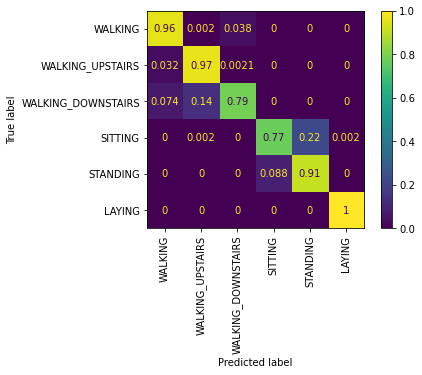

In [33]:
# NOTE: Fill all variables here with default values of the plot_confusion_matrix
display_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
                  'SITTING', 'STANDING', 'LAYING']
plot_confusion_matrix(y_test_str, pred_test, display_labels=display_labels)

## 3.2. Model 2: WiSARD

This model uses Thermometer encoding with quantile based bins and the enginnered features to make the prediction.

In [36]:
from thermometer_encoder import ThermometerEncoder
import wisardpkg as wp
from time import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import pickle

def cross_validation_model1(X, y, n_splits=5, addressSize=[50], thermometer_size=[5], bleachingActivated=[True], 
                            thermometer_columns=None, quantile_based=[True]):
    grid_search_results = []
    best_params = None
    best_accuracy = -1
    
    if not thermometer_columns:
        thermometer_columns = list(range(X.shape[1]))
    
    param_grid_dict = dict()
    param_grid_dict['thermometer_size'] = thermometer_size
    param_grid_dict['addressSize'] = addressSize
    param_grid_dict['bleachingActivated'] = bleachingActivated
    param_grid_dict['quantile_based'] = quantile_based
    
    skf = StratifiedKFold(n_splits=n_splits)
    
    param_grid = ParameterGrid(param_grid_dict)
    
    param_grid_combinations = len(list(param_grid))
    n_combs = n_splits * param_grid_combinations
    progress = tqdm(total=n_combs, position=0, leave=True)
    
    for params in param_grid:
        print(params)
        training_time = []
        training_prediction_time = []
        validation_prediction_time = []
        thermometer_time = []
        training_accuracy = []
        validation_accuracy = []
        for train_index, val_index in skf.split(X, y):
            X_train = X[train_index, :]
            y_train = y[train_index]
            y_train_str = [str(l) for l in y_train]
            
            X_val = X[val_index, :]
            y_val = y[val_index]
            y_val_str = [str(l) for l in y_val]
            
            model = wp.Wisard(params['addressSize'], bleachingActivated=params['bleachingActivated'])
            thermometer = ThermometerEncoder(thermometer_columns, n_bits=params['thermometer_size'],
                                            quantile_based=params['quantile_based'])
            
            start = time()
            X_train = thermometer.fit_transform(X_train).astype(int).tolist()
            X_val = thermometer.transform(X_val).astype(int).tolist()
            end = time()
            thermometer_time.append(end-start)
            
            start = time()
            model.train(X_train, y_train_str)
            end = time()
            training_time.append(end-start)
            
            start = time()
            pred_train = model.classify(X_train)
            end = time()
            training_prediction_time.append(end-start)
            
            start = time()
            pred_val = model.classify(X_val)
            end = time()
            validation_prediction_time.append(end-start)
            
            training_accuracy.append(accuracy_score(y_train_str, pred_train))
            
            validation_accuracy.append(accuracy_score(y_val_str, pred_val))
            
            progress.update()
        
        cv_result = {'training_time_mean': np.mean(training_time),
                     'training_time_std': np.std(training_time),
                     'training_prediction_time_mean': np.mean(training_prediction_time),
                     'training_prediction_time_std': np.std(training_prediction_time),
                     'validation_prediction_time_mean': np.mean(validation_prediction_time),
                     'validation_prediction_time_std': np.std(validation_prediction_time),
                     'thermometer_time_mean': np.mean(thermometer_time),
                     'thermometer_time_std': np.std(thermometer_time),
                     'training_accuracy_mean': np.mean(training_accuracy),
                     'training_accuracy_std': np.std(training_accuracy),
                     'validation_accuracy_mean': np.mean(validation_accuracy),
                     'validation_accuracy_std': np.std(validation_accuracy)}
        
        cv_result = {**params, **cv_result}
        
        grid_search_results.append(cv_result)
        
        if (cv_result['validation_accuracy_mean'] > best_accuracy):
            best_accuracy = cv_result['validation_accuracy_mean']
            best_params = params
        
        print(f"Train acc. mean: {cv_result['training_accuracy_mean']:.4f} | Validation acc. mean: {cv_result['validation_accuracy_mean']:.4f}\n")
    
    grid_search_results = pd.DataFrame(grid_search_results)
    grid_search_results['rank'] = grid_search_results['validation_accuracy_mean'].rank(ascending=False)
    
    return grid_search_results, best_params

In [37]:
thermometer_size = list(range(10, 21))
addressSize = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
gs_model2, best_params_model2 = cross_validation_model1(train_eng, train_labels, n_splits=5, addressSize=addressSize, 
                                                        thermometer_size=thermometer_size, 
                                                        bleachingActivated=[True, False], thermometer_columns=None,
                                                       quantile_based=[True])

  0%|          | 0/1210 [00:00<?, ?it/s]

{'addressSize': 10, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 10}


  0%|          | 5/1210 [04:13<16:55:44, 50.58s/it]

Train acc. mean: 0.9613 | Validation acc. mean: 0.8334

{'addressSize': 10, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 11}


  1%|          | 10/1210 [08:33<17:04:06, 51.21s/it]

Train acc. mean: 0.9610 | Validation acc. mean: 0.8252

{'addressSize': 10, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 12}


  1%|          | 15/1210 [13:00<17:40:35, 53.25s/it]

Train acc. mean: 0.9654 | Validation acc. mean: 0.8308

{'addressSize': 10, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 13}


  2%|▏         | 20/1210 [17:40<18:35:28, 56.24s/it]

Train acc. mean: 0.9652 | Validation acc. mean: 0.8395

{'addressSize': 10, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 14}


  2%|▏         | 25/1210 [22:29<18:42:48, 56.85s/it]

Train acc. mean: 0.9721 | Validation acc. mean: 0.8328

{'addressSize': 10, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 15}


  2%|▏         | 30/1210 [27:16<18:44:27, 57.18s/it]

Train acc. mean: 0.9729 | Validation acc. mean: 0.8368

{'addressSize': 10, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 16}


  3%|▎         | 35/1210 [32:09<19:09:53, 58.72s/it]

Train acc. mean: 0.9739 | Validation acc. mean: 0.8444

{'addressSize': 10, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 17}


  3%|▎         | 40/1210 [37:10<19:33:39, 60.19s/it]

Train acc. mean: 0.9787 | Validation acc. mean: 0.8388

{'addressSize': 10, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 18}


  4%|▎         | 45/1210 [42:15<19:32:00, 60.36s/it]

Train acc. mean: 0.9771 | Validation acc. mean: 0.8400

{'addressSize': 10, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 19}


  4%|▍         | 50/1210 [47:29<20:09:37, 62.57s/it]

Train acc. mean: 0.9775 | Validation acc. mean: 0.8436

{'addressSize': 10, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 20}


  5%|▍         | 55/1210 [52:46<20:30:19, 63.91s/it]

Train acc. mean: 0.9805 | Validation acc. mean: 0.8451

{'addressSize': 10, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 10}


  5%|▍         | 60/1210 [57:02<16:57:13, 53.07s/it]

Train acc. mean: 0.9493 | Validation acc. mean: 0.8115

{'addressSize': 10, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 11}


  5%|▌         | 65/1210 [1:01:19<16:21:38, 51.44s/it]

Train acc. mean: 0.9569 | Validation acc. mean: 0.8187

{'addressSize': 10, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 12}


  6%|▌         | 70/1210 [1:05:50<17:13:40, 54.40s/it]

Train acc. mean: 0.9619 | Validation acc. mean: 0.8256

{'addressSize': 10, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 13}


  6%|▌         | 75/1210 [1:10:27<17:19:53, 54.97s/it]

Train acc. mean: 0.9672 | Validation acc. mean: 0.8346

{'addressSize': 10, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 14}


  7%|▋         | 80/1210 [1:15:08<17:37:16, 56.14s/it]

Train acc. mean: 0.9657 | Validation acc. mean: 0.8307

{'addressSize': 10, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 15}


  7%|▋         | 85/1210 [1:19:53<17:44:56, 56.80s/it]

Train acc. mean: 0.9697 | Validation acc. mean: 0.8349

{'addressSize': 10, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 16}


  7%|▋         | 90/1210 [1:24:46<18:12:32, 58.53s/it]

Train acc. mean: 0.9732 | Validation acc. mean: 0.8451

{'addressSize': 10, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 17}


  8%|▊         | 95/1210 [1:29:45<18:28:00, 59.62s/it]

Train acc. mean: 0.9717 | Validation acc. mean: 0.8313

{'addressSize': 10, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 18}


  8%|▊         | 100/1210 [1:34:47<18:31:18, 60.07s/it]

Train acc. mean: 0.9775 | Validation acc. mean: 0.8339

{'addressSize': 10, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 19}


  9%|▊         | 105/1210 [1:40:06<19:16:59, 62.82s/it]

Train acc. mean: 0.9795 | Validation acc. mean: 0.8405

{'addressSize': 10, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 20}


  9%|▉         | 110/1210 [1:45:20<19:16:41, 63.09s/it]

Train acc. mean: 0.9787 | Validation acc. mean: 0.8439

{'addressSize': 15, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 10}


 10%|▉         | 115/1210 [1:49:31<15:53:36, 52.25s/it]

Train acc. mean: 0.9796 | Validation acc. mean: 0.8372

{'addressSize': 15, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 11}


 10%|▉         | 120/1210 [1:53:52<15:55:26, 52.59s/it]

Train acc. mean: 0.9842 | Validation acc. mean: 0.8410

{'addressSize': 15, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 12}


 10%|█         | 125/1210 [1:58:19<16:03:52, 53.30s/it]

Train acc. mean: 0.9826 | Validation acc. mean: 0.8458

{'addressSize': 15, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 13}


 11%|█         | 130/1210 [2:02:47<16:08:19, 53.80s/it]

Train acc. mean: 0.9848 | Validation acc. mean: 0.8482

{'addressSize': 15, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 14}


 11%|█         | 135/1210 [2:07:29<16:40:40, 55.85s/it]

Train acc. mean: 0.9875 | Validation acc. mean: 0.8509

{'addressSize': 15, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 15}


 12%|█▏        | 140/1210 [2:12:12<16:48:33, 56.55s/it]

Train acc. mean: 0.9884 | Validation acc. mean: 0.8486

{'addressSize': 15, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 16}


 12%|█▏        | 145/1210 [2:17:03<17:13:52, 58.25s/it]

Train acc. mean: 0.9901 | Validation acc. mean: 0.8494

{'addressSize': 15, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 17}


 12%|█▏        | 150/1210 [2:21:57<17:15:54, 58.64s/it]

Train acc. mean: 0.9916 | Validation acc. mean: 0.8538

{'addressSize': 15, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 18}


 13%|█▎        | 155/1210 [2:26:59<17:30:07, 59.72s/it]

Train acc. mean: 0.9923 | Validation acc. mean: 0.8636

{'addressSize': 15, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 19}


 13%|█▎        | 160/1210 [2:32:09<18:03:20, 61.91s/it]

Train acc. mean: 0.9925 | Validation acc. mean: 0.8543

{'addressSize': 15, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 20}


 14%|█▎        | 165/1210 [2:37:24<18:13:47, 62.80s/it]

Train acc. mean: 0.9928 | Validation acc. mean: 0.8523

{'addressSize': 15, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 10}


 14%|█▍        | 170/1210 [2:41:35<15:04:29, 52.18s/it]

Train acc. mean: 0.9799 | Validation acc. mean: 0.8372

{'addressSize': 15, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 11}


 14%|█▍        | 175/1210 [2:45:52<14:46:42, 51.40s/it]

Train acc. mean: 0.9821 | Validation acc. mean: 0.8390

{'addressSize': 15, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 12}


 15%|█▍        | 180/1210 [2:50:17<15:10:09, 53.02s/it]

Train acc. mean: 0.9853 | Validation acc. mean: 0.8426

{'addressSize': 15, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 13}


 15%|█▌        | 185/1210 [2:54:49<15:23:32, 54.06s/it]

Train acc. mean: 0.9868 | Validation acc. mean: 0.8485

{'addressSize': 15, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 14}


 16%|█▌        | 190/1210 [2:59:28<15:36:08, 55.07s/it]

Train acc. mean: 0.9863 | Validation acc. mean: 0.8444

{'addressSize': 15, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 15}


 16%|█▌        | 195/1210 [3:04:11<15:54:15, 56.41s/it]

Train acc. mean: 0.9887 | Validation acc. mean: 0.8541

{'addressSize': 15, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 16}


 17%|█▋        | 200/1210 [3:09:05<16:17:57, 58.10s/it]

Train acc. mean: 0.9910 | Validation acc. mean: 0.8549

{'addressSize': 15, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 17}


 17%|█▋        | 205/1210 [3:13:57<16:19:55, 58.50s/it]

Train acc. mean: 0.9908 | Validation acc. mean: 0.8561

{'addressSize': 15, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 18}


 17%|█▋        | 210/1210 [3:18:58<16:33:49, 59.63s/it]

Train acc. mean: 0.9928 | Validation acc. mean: 0.8475

{'addressSize': 15, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 19}


 18%|█▊        | 215/1210 [3:24:07<17:00:30, 61.54s/it]

Train acc. mean: 0.9922 | Validation acc. mean: 0.8558

{'addressSize': 15, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 20}


 18%|█▊        | 220/1210 [3:29:17<17:03:03, 62.00s/it]

Train acc. mean: 0.9928 | Validation acc. mean: 0.8531

{'addressSize': 20, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 10}


 19%|█▊        | 225/1210 [3:33:30<14:22:35, 52.54s/it]

Train acc. mean: 0.9924 | Validation acc. mean: 0.8560

{'addressSize': 20, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 11}


 19%|█▉        | 230/1210 [3:37:46<13:51:37, 50.92s/it]

Train acc. mean: 0.9932 | Validation acc. mean: 0.8539

{'addressSize': 20, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 12}


 19%|█▉        | 235/1210 [3:42:08<14:09:39, 52.29s/it]

Train acc. mean: 0.9935 | Validation acc. mean: 0.8541

{'addressSize': 20, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 13}


 20%|█▉        | 240/1210 [3:46:38<14:27:53, 53.68s/it]

Train acc. mean: 0.9938 | Validation acc. mean: 0.8600

{'addressSize': 20, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 14}


 20%|██        | 245/1210 [3:51:18<14:46:52, 55.14s/it]

Train acc. mean: 0.9939 | Validation acc. mean: 0.8502

{'addressSize': 20, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 15}


 21%|██        | 250/1210 [3:56:03<15:05:41, 56.61s/it]

Train acc. mean: 0.9962 | Validation acc. mean: 0.8670

{'addressSize': 20, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 16}


 21%|██        | 255/1210 [4:00:52<15:22:04, 57.93s/it]

Train acc. mean: 0.9967 | Validation acc. mean: 0.8626

{'addressSize': 20, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 17}


 21%|██▏       | 260/1210 [4:05:31<15:09:24, 57.44s/it]

Train acc. mean: 0.9975 | Validation acc. mean: 0.8560

{'addressSize': 20, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 18}


 22%|██▏       | 265/1210 [4:10:11<14:42:03, 56.00s/it]

Train acc. mean: 0.9981 | Validation acc. mean: 0.8630

{'addressSize': 20, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 19}


 22%|██▏       | 270/1210 [4:15:29<16:29:25, 63.15s/it]

Train acc. mean: 0.9976 | Validation acc. mean: 0.8614

{'addressSize': 20, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 20}


 23%|██▎       | 275/1210 [4:20:17<15:10:04, 58.40s/it]

Train acc. mean: 0.9977 | Validation acc. mean: 0.8682

{'addressSize': 20, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 10}


 23%|██▎       | 280/1210 [4:24:16<12:53:48, 49.92s/it]

Train acc. mean: 0.9919 | Validation acc. mean: 0.8482

{'addressSize': 20, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 11}


 24%|██▎       | 285/1210 [4:28:14<12:15:20, 47.70s/it]

Train acc. mean: 0.9951 | Validation acc. mean: 0.8509

{'addressSize': 20, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 12}


 24%|██▍       | 290/1210 [4:32:20<12:33:02, 49.11s/it]

Train acc. mean: 0.9940 | Validation acc. mean: 0.8602

{'addressSize': 20, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 13}


 24%|██▍       | 295/1210 [4:36:34<12:55:14, 50.84s/it]

Train acc. mean: 0.9944 | Validation acc. mean: 0.8556

{'addressSize': 20, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 14}


 25%|██▍       | 300/1210 [4:40:54<12:58:48, 51.35s/it]

Train acc. mean: 0.9958 | Validation acc. mean: 0.8512

{'addressSize': 20, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 15}


 25%|██▌       | 305/1210 [4:45:28<13:45:25, 54.72s/it]

Train acc. mean: 0.9952 | Validation acc. mean: 0.8599

{'addressSize': 20, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 16}


 26%|██▌       | 310/1210 [4:49:53<13:26:06, 53.74s/it]

Train acc. mean: 0.9969 | Validation acc. mean: 0.8653

{'addressSize': 20, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 17}


 26%|██▌       | 315/1210 [4:54:31<13:41:06, 55.05s/it]

Train acc. mean: 0.9974 | Validation acc. mean: 0.8674

{'addressSize': 20, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 18}


 26%|██▋       | 320/1210 [4:59:13<13:52:20, 56.11s/it]

Train acc. mean: 0.9980 | Validation acc. mean: 0.8561

{'addressSize': 20, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 19}


 27%|██▋       | 325/1210 [5:04:03<14:15:52, 58.03s/it]

Train acc. mean: 0.9979 | Validation acc. mean: 0.8685

{'addressSize': 20, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 20}


 27%|██▋       | 330/1210 [5:09:00<14:31:43, 59.44s/it]

Train acc. mean: 0.9982 | Validation acc. mean: 0.8690

{'addressSize': 25, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 10}


 28%|██▊       | 335/1210 [5:13:00<12:04:54, 49.71s/it]

Train acc. mean: 0.9972 | Validation acc. mean: 0.8621

{'addressSize': 25, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 11}


 28%|██▊       | 340/1210 [5:17:01<11:33:00, 47.79s/it]

Train acc. mean: 0.9982 | Validation acc. mean: 0.8630

{'addressSize': 25, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 12}


 29%|██▊       | 345/1210 [5:20:58<11:26:36, 47.63s/it]

Train acc. mean: 0.9980 | Validation acc. mean: 0.8678

{'addressSize': 25, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 13}


 29%|██▉       | 350/1210 [5:25:03<11:48:17, 49.42s/it]

Train acc. mean: 0.9979 | Validation acc. mean: 0.8539

{'addressSize': 25, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 14}


 29%|██▉       | 355/1210 [5:29:41<12:59:35, 54.71s/it]

Train acc. mean: 0.9983 | Validation acc. mean: 0.8648

{'addressSize': 25, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 15}


 30%|██▉       | 360/1210 [5:34:18<13:04:09, 55.35s/it]

Train acc. mean: 0.9988 | Validation acc. mean: 0.8739

{'addressSize': 25, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 16}


 30%|███       | 365/1210 [5:39:06<13:20:39, 56.85s/it]

Train acc. mean: 0.9989 | Validation acc. mean: 0.8686

{'addressSize': 25, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 17}


 31%|███       | 370/1210 [5:43:52<13:22:15, 57.30s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8760

{'addressSize': 25, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 18}


 31%|███       | 375/1210 [5:48:46<13:30:47, 58.26s/it]

Train acc. mean: 0.9993 | Validation acc. mean: 0.8704

{'addressSize': 25, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 19}


 31%|███▏      | 380/1210 [5:53:50<14:00:12, 60.74s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8741

{'addressSize': 25, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 20}


 32%|███▏      | 385/1210 [5:58:54<13:56:57, 60.87s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8754

{'addressSize': 25, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 10}


 32%|███▏      | 390/1210 [6:03:09<11:57:17, 52.48s/it]

Train acc. mean: 0.9979 | Validation acc. mean: 0.8628

{'addressSize': 25, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 11}


 33%|███▎      | 395/1210 [6:07:22<11:31:37, 50.92s/it]

Train acc. mean: 0.9976 | Validation acc. mean: 0.8554

{'addressSize': 25, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 12}


 33%|███▎      | 400/1210 [6:11:41<11:38:14, 51.72s/it]

Train acc. mean: 0.9980 | Validation acc. mean: 0.8599

{'addressSize': 25, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 13}


 33%|███▎      | 405/1210 [6:16:05<11:49:20, 52.87s/it]

Train acc. mean: 0.9982 | Validation acc. mean: 0.8662

{'addressSize': 25, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 14}


 34%|███▍      | 410/1210 [6:20:37<11:57:27, 53.81s/it]

Train acc. mean: 0.9979 | Validation acc. mean: 0.8694

{'addressSize': 25, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 15}


 34%|███▍      | 415/1210 [6:25:14<12:13:46, 55.38s/it]

Train acc. mean: 0.9992 | Validation acc. mean: 0.8712

{'addressSize': 25, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 16}


 35%|███▍      | 420/1210 [6:29:57<12:25:15, 56.60s/it]

Train acc. mean: 0.9991 | Validation acc. mean: 0.8738

{'addressSize': 25, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 17}


 35%|███▌      | 425/1210 [6:34:43<12:30:19, 57.35s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8716

{'addressSize': 25, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 18}


 36%|███▌      | 430/1210 [6:39:41<12:40:14, 58.48s/it]

Train acc. mean: 0.9992 | Validation acc. mean: 0.8690

{'addressSize': 25, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 19}


 36%|███▌      | 435/1210 [6:44:40<12:50:19, 59.64s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8683

{'addressSize': 25, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 20}


 36%|███▋      | 440/1210 [6:49:44<12:57:01, 60.55s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8745

{'addressSize': 30, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 10}


 37%|███▋      | 445/1210 [6:53:54<11:01:37, 51.89s/it]

Train acc. mean: 0.9994 | Validation acc. mean: 0.8713

{'addressSize': 30, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 11}


 37%|███▋      | 450/1210 [6:58:03<10:30:25, 49.77s/it]

Train acc. mean: 0.9994 | Validation acc. mean: 0.8621

{'addressSize': 30, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 12}


 38%|███▊      | 455/1210 [7:02:22<10:50:43, 51.71s/it]

Train acc. mean: 0.9991 | Validation acc. mean: 0.8731

{'addressSize': 30, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 13}


 38%|███▊      | 460/1210 [7:06:47<11:04:56, 53.20s/it]

Train acc. mean: 0.9993 | Validation acc. mean: 0.8666

{'addressSize': 30, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 14}


 38%|███▊      | 465/1210 [7:11:18<11:06:48, 53.70s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8716

{'addressSize': 30, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 15}


 39%|███▉      | 470/1210 [7:16:36<13:09:27, 64.01s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8736

{'addressSize': 30, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 16}


 39%|███▉      | 475/1210 [7:21:17<11:47:40, 57.77s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8832

{'addressSize': 30, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 17}


 40%|███▉      | 480/1210 [7:26:02<11:38:41, 57.43s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8792

{'addressSize': 30, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 18}


 40%|████      | 485/1210 [7:30:52<11:37:49, 57.75s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8813

{'addressSize': 30, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 19}


 40%|████      | 490/1210 [7:35:56<12:10:25, 60.87s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8794

{'addressSize': 30, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 20}


 41%|████      | 495/1210 [7:40:54<11:58:12, 60.27s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8864

{'addressSize': 30, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 10}


 41%|████▏     | 500/1210 [7:44:58<9:59:39, 50.67s/it] 

Train acc. mean: 0.9992 | Validation acc. mean: 0.8670

{'addressSize': 30, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 11}


 42%|████▏     | 505/1210 [7:49:08<9:42:43, 49.59s/it] 

Train acc. mean: 0.9995 | Validation acc. mean: 0.8668

{'addressSize': 30, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 12}


 42%|████▏     | 510/1210 [7:53:31<10:10:46, 52.35s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8746

{'addressSize': 30, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 13}


 43%|████▎     | 515/1210 [7:57:53<10:04:53, 52.22s/it]

Train acc. mean: 0.9995 | Validation acc. mean: 0.8749

{'addressSize': 30, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 14}


 43%|████▎     | 520/1210 [8:02:22<10:15:25, 53.52s/it]

Train acc. mean: 0.9995 | Validation acc. mean: 0.8739

{'addressSize': 30, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 15}


 43%|████▎     | 525/1210 [8:07:00<10:32:20, 55.39s/it]

Train acc. mean: 0.9996 | Validation acc. mean: 0.8750

{'addressSize': 30, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 16}


 44%|████▍     | 530/1210 [8:11:40<10:35:26, 56.07s/it]

Train acc. mean: 0.9998 | Validation acc. mean: 0.8758

{'addressSize': 30, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 17}


 44%|████▍     | 535/1210 [8:16:26<10:44:05, 57.25s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8798

{'addressSize': 30, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 18}


 45%|████▍     | 540/1210 [8:21:15<10:41:00, 57.40s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8818

{'addressSize': 30, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 19}


 45%|████▌     | 545/1210 [8:26:14<10:59:04, 59.47s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8754

{'addressSize': 30, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 20}


 45%|████▌     | 550/1210 [8:31:12<10:56:13, 59.66s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8819

{'addressSize': 35, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 10}


 46%|████▌     | 555/1210 [8:35:20<9:27:26, 51.98s/it] 

Train acc. mean: 0.9997 | Validation acc. mean: 0.8768

{'addressSize': 35, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 11}


 46%|████▋     | 560/1210 [8:39:26<8:55:13, 49.41s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8769

{'addressSize': 35, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 12}


 47%|████▋     | 565/1210 [8:43:45<9:10:44, 51.23s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8772

{'addressSize': 35, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 13}


 47%|████▋     | 570/1210 [8:48:07<9:16:43, 52.19s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8696

{'addressSize': 35, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 14}


 48%|████▊     | 575/1210 [8:52:40<9:38:58, 54.71s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8750

{'addressSize': 35, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 15}


 48%|████▊     | 580/1210 [8:57:15<9:36:09, 54.87s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8772

{'addressSize': 35, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 16}


 48%|████▊     | 585/1210 [9:01:57<9:47:51, 56.43s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8818

{'addressSize': 35, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 17}


 49%|████▉     | 590/1210 [9:06:45<9:57:32, 57.83s/it] 

Train acc. mean: 1.0000 | Validation acc. mean: 0.8851

{'addressSize': 35, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 18}


 49%|████▉     | 595/1210 [9:11:33<9:47:39, 57.33s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8751

{'addressSize': 35, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 19}


 50%|████▉     | 600/1210 [9:16:32<10:04:29, 59.46s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8856

{'addressSize': 35, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 20}


 50%|█████     | 605/1210 [9:21:29<9:59:27, 59.45s/it] 

Train acc. mean: 1.0000 | Validation acc. mean: 0.8874

{'addressSize': 35, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 10}


 50%|█████     | 610/1210 [9:25:35<8:31:43, 51.17s/it]

Train acc. mean: 0.9997 | Validation acc. mean: 0.8675

{'addressSize': 35, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 11}


 51%|█████     | 615/1210 [9:29:42<8:10:22, 49.45s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8651

{'addressSize': 35, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 12}


 51%|█████     | 620/1210 [9:33:59<8:22:29, 51.10s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8734

{'addressSize': 35, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 13}


 52%|█████▏    | 625/1210 [9:38:30<8:38:32, 53.18s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8757

{'addressSize': 35, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 14}


 52%|█████▏    | 630/1210 [9:43:02<8:40:02, 53.80s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8716

{'addressSize': 35, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 15}


 52%|█████▏    | 635/1210 [9:47:38<8:48:19, 55.13s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8758

{'addressSize': 35, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 16}


 53%|█████▎    | 640/1210 [9:52:20<9:00:41, 56.91s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8807

{'addressSize': 35, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 17}


 53%|█████▎    | 645/1210 [9:57:12<9:03:47, 57.75s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8791

{'addressSize': 35, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 18}


 54%|█████▎    | 650/1210 [10:02:01<8:55:44, 57.40s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8765

{'addressSize': 35, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 19}


 54%|█████▍    | 655/1210 [10:07:02<9:16:40, 60.18s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8829

{'addressSize': 35, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 20}


 55%|█████▍    | 660/1210 [10:12:00<9:07:51, 59.77s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8765

{'addressSize': 40, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 10}


 55%|█████▍    | 665/1210 [10:16:07<7:43:20, 51.01s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8720

{'addressSize': 40, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 11}


 55%|█████▌    | 670/1210 [10:20:14<7:24:40, 49.41s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8746

{'addressSize': 40, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 12}


 56%|█████▌    | 675/1210 [10:24:30<7:36:01, 51.14s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8750

{'addressSize': 40, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 13}


 56%|█████▌    | 680/1210 [10:28:52<7:38:16, 51.88s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8838

{'addressSize': 40, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 14}


 57%|█████▋    | 685/1210 [10:33:21<7:47:13, 53.40s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8711

{'addressSize': 40, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 15}


 57%|█████▋    | 690/1210 [10:37:59<7:56:14, 54.95s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8794

{'addressSize': 40, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 16}


 57%|█████▋    | 695/1210 [10:42:38<7:59:47, 55.90s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8833

{'addressSize': 40, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 17}


 58%|█████▊    | 700/1210 [10:47:23<8:04:18, 56.98s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8783

{'addressSize': 40, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 18}


 58%|█████▊    | 705/1210 [10:52:13<8:06:26, 57.80s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8830

{'addressSize': 40, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 19}


 59%|█████▊    | 710/1210 [10:57:16<8:18:28, 59.82s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8872

{'addressSize': 40, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 20}


 59%|█████▉    | 715/1210 [11:02:23<8:28:11, 61.60s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8822

{'addressSize': 40, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 10}


 60%|█████▉    | 720/1210 [11:06:34<7:06:01, 52.17s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8787

{'addressSize': 40, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 11}


 60%|█████▉    | 725/1210 [11:10:42<6:41:15, 49.64s/it]

Train acc. mean: 0.9999 | Validation acc. mean: 0.8731

{'addressSize': 40, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 12}


 60%|██████    | 730/1210 [11:14:58<6:47:44, 50.97s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8764

{'addressSize': 40, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 13}


 61%|██████    | 735/1210 [11:19:19<6:50:56, 51.91s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8804

{'addressSize': 40, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 14}


 61%|██████    | 740/1210 [11:23:48<6:58:14, 53.39s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8810

{'addressSize': 40, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 15}


 62%|██████▏   | 745/1210 [11:28:22<7:01:56, 54.44s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8838

{'addressSize': 40, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 16}


 62%|██████▏   | 750/1210 [11:33:01<7:07:41, 55.79s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8821

{'addressSize': 40, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 17}


 62%|██████▏   | 755/1210 [11:37:48<7:14:39, 57.32s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8845

{'addressSize': 40, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 18}


 63%|██████▎   | 760/1210 [11:42:36<7:10:58, 57.46s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8837

{'addressSize': 40, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 19}


 63%|██████▎   | 765/1210 [11:47:36<7:24:07, 59.88s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8833

{'addressSize': 40, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 20}


 64%|██████▎   | 770/1210 [11:52:37<7:25:10, 60.70s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8807

{'addressSize': 45, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 10}


 64%|██████▍   | 775/1210 [11:56:47<6:15:06, 51.74s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8727

{'addressSize': 45, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 11}


 64%|██████▍   | 780/1210 [12:00:52<5:53:45, 49.36s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8762

{'addressSize': 45, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 12}


 65%|██████▍   | 785/1210 [12:05:12<6:10:12, 52.27s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8766

{'addressSize': 45, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 13}


 65%|██████▌   | 790/1210 [12:09:34<6:06:50, 52.41s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8780

{'addressSize': 45, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 14}


 66%|██████▌   | 795/1210 [12:14:02<6:07:51, 53.19s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8735

{'addressSize': 45, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 15}


 66%|██████▌   | 800/1210 [12:18:36<6:12:13, 54.47s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8825

{'addressSize': 45, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 16}


 67%|██████▋   | 805/1210 [12:23:15<6:16:39, 55.80s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8825

{'addressSize': 45, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 17}


 67%|██████▋   | 810/1210 [12:27:58<6:17:26, 56.62s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8860

{'addressSize': 45, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 18}


 67%|██████▋   | 815/1210 [12:32:47<6:16:41, 57.22s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8825

{'addressSize': 45, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 19}


 68%|██████▊   | 820/1210 [12:37:47<6:28:29, 59.77s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8882

{'addressSize': 45, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 20}


 68%|██████▊   | 825/1210 [12:42:43<6:20:55, 59.37s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8885

{'addressSize': 45, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 10}


 69%|██████▊   | 830/1210 [12:46:50<5:22:57, 50.99s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8709

{'addressSize': 45, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 11}


 69%|██████▉   | 835/1210 [12:50:57<5:09:38, 49.54s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8764

{'addressSize': 45, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 12}


 69%|██████▉   | 840/1210 [12:55:21<5:23:55, 52.53s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8738

{'addressSize': 45, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 13}


 70%|██████▉   | 845/1210 [12:59:40<5:15:31, 51.87s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8741

{'addressSize': 45, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 14}


 70%|███████   | 850/1210 [13:04:12<5:22:32, 53.76s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8766

{'addressSize': 45, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 15}


 71%|███████   | 855/1210 [13:08:49<5:24:27, 54.84s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8815

{'addressSize': 45, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 16}


 71%|███████   | 860/1210 [13:13:29<5:28:07, 56.25s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8860

{'addressSize': 45, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 17}


 71%|███████▏  | 865/1210 [13:18:12<5:25:53, 56.68s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8810

{'addressSize': 45, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 18}


 72%|███████▏  | 870/1210 [13:23:00<5:24:07, 57.20s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8768

{'addressSize': 45, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 19}


 72%|███████▏  | 875/1210 [13:27:59<5:32:05, 59.48s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8811

{'addressSize': 45, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 20}


 73%|███████▎  | 880/1210 [13:32:56<5:26:54, 59.44s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8859

{'addressSize': 50, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 10}


 73%|███████▎  | 885/1210 [13:37:05<4:36:56, 51.13s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8738

{'addressSize': 50, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 11}


 74%|███████▎  | 890/1210 [13:41:14<4:29:15, 50.48s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8726

{'addressSize': 50, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 12}


 74%|███████▍  | 895/1210 [13:45:36<4:33:26, 52.09s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8821

{'addressSize': 50, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 13}


 74%|███████▍  | 900/1210 [13:49:56<4:28:10, 51.90s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8770

{'addressSize': 50, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 14}


 75%|███████▍  | 905/1210 [13:54:32<4:36:49, 54.46s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8761

{'addressSize': 50, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 15}


 75%|███████▌  | 910/1210 [13:59:05<4:32:07, 54.42s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8832

{'addressSize': 50, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 16}


 76%|███████▌  | 915/1210 [14:03:43<4:32:45, 55.48s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8832

{'addressSize': 50, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 17}


 76%|███████▌  | 920/1210 [14:08:31<4:36:25, 57.19s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8874

{'addressSize': 50, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 18}


 76%|███████▋  | 925/1210 [14:13:17<4:31:04, 57.07s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8840

{'addressSize': 50, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 19}


 77%|███████▋  | 930/1210 [14:18:16<4:36:00, 59.14s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8864

{'addressSize': 50, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 20}


 77%|███████▋  | 935/1210 [14:23:12<4:32:06, 59.37s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8894

{'addressSize': 50, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 10}


 78%|███████▊  | 940/1210 [14:27:18<3:49:03, 50.90s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8753

{'addressSize': 50, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 11}


 78%|███████▊  | 945/1210 [14:31:23<3:36:57, 49.12s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8713

{'addressSize': 50, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 12}


 79%|███████▊  | 950/1210 [14:35:45<3:47:19, 52.46s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8734

{'addressSize': 50, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 13}


 79%|███████▉  | 955/1210 [14:40:05<3:41:29, 52.12s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8764

{'addressSize': 50, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 14}


 79%|███████▉  | 960/1210 [14:44:32<3:41:17, 53.11s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8760

{'addressSize': 50, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 15}


 80%|███████▉  | 965/1210 [14:49:07<3:42:04, 54.39s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8845

{'addressSize': 50, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 16}


 80%|████████  | 970/1210 [14:53:53<3:49:34, 57.39s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8791

{'addressSize': 50, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 17}


 81%|████████  | 975/1210 [14:58:38<3:43:24, 57.04s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8821

{'addressSize': 50, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 18}


 81%|████████  | 980/1210 [15:03:25<3:38:59, 57.13s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8860

{'addressSize': 50, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 19}


 81%|████████▏ | 985/1210 [15:08:32<3:49:18, 61.15s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8877

{'addressSize': 50, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 20}


 82%|████████▏ | 990/1210 [15:13:37<3:41:55, 60.53s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8866

{'addressSize': 55, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 10}


 82%|████████▏ | 995/1210 [15:17:45<3:03:12, 51.13s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8728

{'addressSize': 55, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 11}


 83%|████████▎ | 1000/1210 [15:21:50<2:52:00, 49.14s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8739

{'addressSize': 55, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 12}


 83%|████████▎ | 1005/1210 [15:26:10<2:56:41, 51.71s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8779

{'addressSize': 55, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 13}


 83%|████████▎ | 1010/1210 [15:30:28<2:52:08, 51.64s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8792

{'addressSize': 55, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 14}


 84%|████████▍ | 1015/1210 [15:34:57<2:52:50, 53.18s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8792

{'addressSize': 55, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 15}


 84%|████████▍ | 1020/1210 [15:39:34<2:53:09, 54.68s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8822

{'addressSize': 55, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 16}


 85%|████████▍ | 1025/1210 [15:44:12<2:51:14, 55.54s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8807

{'addressSize': 55, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 17}


 85%|████████▌ | 1030/1210 [15:48:38<2:39:41, 53.23s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8828

{'addressSize': 55, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 18}


 86%|████████▌ | 1035/1210 [15:53:11<2:39:10, 54.58s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8874

{'addressSize': 55, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 19}


 86%|████████▌ | 1040/1210 [15:58:15<2:49:21, 59.77s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8879

{'addressSize': 55, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 20}


 86%|████████▋ | 1045/1210 [16:03:15<2:45:20, 60.13s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8930

{'addressSize': 55, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 10}


 87%|████████▋ | 1050/1210 [16:07:28<2:18:59, 52.12s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8701

{'addressSize': 55, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 11}


 87%|████████▋ | 1055/1210 [16:11:43<2:13:16, 51.59s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8712

{'addressSize': 55, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 12}


 88%|████████▊ | 1060/1210 [16:16:42<2:26:41, 58.68s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8758

{'addressSize': 55, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 13}


 88%|████████▊ | 1065/1210 [16:21:41<2:24:08, 59.65s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8794

{'addressSize': 55, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 14}


 88%|████████▊ | 1070/1210 [16:26:43<2:17:31, 58.94s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8749

{'addressSize': 55, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 15}


 89%|████████▉ | 1075/1210 [16:30:55<1:56:43, 51.88s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8837

{'addressSize': 55, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 16}


 89%|████████▉ | 1080/1210 [16:35:47<2:07:21, 58.78s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8813

{'addressSize': 55, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 17}


 90%|████████▉ | 1085/1210 [16:41:08<2:13:01, 63.85s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8847

{'addressSize': 55, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 18}


 90%|█████████ | 1090/1210 [16:46:39<2:11:12, 65.60s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8872

{'addressSize': 55, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 19}


 90%|█████████ | 1095/1210 [16:52:20<2:10:32, 68.11s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8896

{'addressSize': 55, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 20}


 91%|█████████ | 1100/1210 [16:57:26<1:51:29, 60.82s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8857

{'addressSize': 60, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 10}


 91%|█████████▏| 1105/1210 [17:01:12<1:23:55, 47.96s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8668

{'addressSize': 60, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 11}


 92%|█████████▏| 1110/1210 [17:05:09<1:19:08, 47.48s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8732

{'addressSize': 60, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 12}


 92%|█████████▏| 1115/1210 [17:09:08<1:15:41, 47.80s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8753

{'addressSize': 60, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 13}


 93%|█████████▎| 1120/1210 [17:13:06<1:11:29, 47.66s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8775

{'addressSize': 60, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 14}


 93%|█████████▎| 1125/1210 [17:17:13<1:09:10, 48.83s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8735

{'addressSize': 60, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 15}


 93%|█████████▎| 1130/1210 [17:21:18<1:05:22, 49.04s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8792

{'addressSize': 60, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 16}


 94%|█████████▍| 1135/1210 [17:37:01<2:05:27, 100.37s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8853

{'addressSize': 60, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 17}


 94%|█████████▍| 1140/1210 [17:41:17<1:09:37, 59.68s/it] 

Train acc. mean: 1.0000 | Validation acc. mean: 0.8900

{'addressSize': 60, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 18}


 95%|█████████▍| 1145/1210 [17:45:42<58:22, 53.89s/it]  

Train acc. mean: 1.0000 | Validation acc. mean: 0.8792

{'addressSize': 60, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 19}


 95%|█████████▌| 1150/1210 [17:50:17<54:41, 54.69s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8830

{'addressSize': 60, 'bleachingActivated': True, 'quantile_based': True, 'thermometer_size': 20}


 95%|█████████▌| 1155/1210 [17:54:44<49:22, 53.86s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8857

{'addressSize': 60, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 10}


 96%|█████████▋| 1165/1210 [18:42:30<2:43:47, 218.40s/it] 

Train acc. mean: 1.0000 | Validation acc. mean: 0.8693

{'addressSize': 60, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 12}


 97%|█████████▋| 1170/1210 [18:46:27<50:37, 75.95s/it]   

Train acc. mean: 1.0000 | Validation acc. mean: 0.8675

{'addressSize': 60, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 13}


 97%|█████████▋| 1175/1210 [18:51:02<36:10, 62.02s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8724

{'addressSize': 60, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 14}


 98%|█████████▊| 1180/1210 [18:56:24<31:32, 63.09s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8760

{'addressSize': 60, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 15}


 98%|█████████▊| 1185/1210 [19:00:49<22:07, 53.10s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8784

{'addressSize': 60, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 16}


 98%|█████████▊| 1190/1210 [19:05:38<19:40, 59.00s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8818

{'addressSize': 60, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 17}


 99%|█████████▉| 1195/1210 [19:10:34<14:18, 57.26s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8845

{'addressSize': 60, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 18}


 99%|█████████▉| 1200/1210 [19:14:55<08:47, 52.78s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8847

{'addressSize': 60, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 19}


100%|█████████▉| 1205/1210 [19:19:26<04:29, 53.88s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8828

{'addressSize': 60, 'bleachingActivated': False, 'quantile_based': True, 'thermometer_size': 20}


100%|██████████| 1210/1210 [19:24:23<00:00, 60.10s/it]

Train acc. mean: 1.0000 | Validation acc. mean: 0.8883



In [38]:
with open('results/model2_best_params.pickle', 'wb') as file:
    pickle.dump(best_params_model2, file)
    
best_params_model2

{'addressSize': 55,
 'bleachingActivated': True,
 'quantile_based': True,
 'thermometer_size': 20}

In [39]:
gs_model2 = gs_model2.sort_values('rank').reset_index(drop=True)

with open('results/model2_gs_results.pickle', 'wb') as file:
    pickle.dump(gs_model2, file)

gs_model2

,addressSize,bleachingActivated,quantile_based,thermometer_size,training_time_mean,training_time_std,training_prediction_time_mean,training_prediction_time_std,validation_prediction_time_mean,validation_prediction_time_std,thermometer_time_mean,thermometer_time_std,training_accuracy_mean,training_accuracy_std,validation_accuracy_mean,validation_accuracy_std,rank
0,55,True,True,20,1.622067,0.029580,2.689816,0.014244,0.708716,0.047501,54.244749,0.845184,1.000000,0.000000,0.892957,0.021283,1.0
1,60,True,True,17,1.103059,0.035972,1.958751,0.049755,0.471940,0.004260,47.106877,0.621867,1.000000,0.000000,0.889966,0.024313,2.0
2,55,False,True,19,1.744137,0.180816,3.073003,0.222979,0.756793,0.042757,61.731424,0.812818,1.000000,0.000000,0.889556,0.026765,3.0
3,50,True,True,20,1.593741,0.139189,2.773217,0.082100,0.684790,0.007165,53.394073,0.983812,1.000000,0.000000,0.889421,0.022985,4.0
4,45,True,True,20,1.563248,0.044352,2.873549,0.144017,0.745826,0.053319,53.093407,0.812724,1.000000,0.000000,0.888467,0.020176,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,10,False,True,14,1.064188,0.112575,2.997021,0.376208,0.767965,0.117642,50.850222,0.699074,0.965656,0.004147,0.830658,0.027192,238.0
238,10,False,True,12,0.916464,0.044892,2.399633,0.063374,0.587396,0.017830,49.653549,2.324658,0.961915,0.004755,0.825628,0.024711,239.0
239,10,True,True,11,0.874863,0.193275,2.493332,0.450786,0.633322,0.094790,47.445952,2.235502,0.960963,0.004247,0.825219,0.037582,240.0
240,10,False,True,11,0.807050,0.048397,2.234605,0.051671,0.546941,0.031198,47.288705,1.102185,0.956882,0.007182,0.818689,0.023190,241.0


In [40]:
with open('results/model2_gs_results.pickle', 'rb') as file:
    gs_model2 = pickle.load(file)

In [41]:
with open('results/model2_best_params.pickle', 'rb') as file:
    best_params_model2 = pickle.load(file)

In [42]:
# Preprocessing train_eng, train_labels
y_train_str = [str(l) for l in train_labels]
y_test_str = [str(l) for l in test_labels]

model = wp.Wisard(best_params_model2['addressSize'], bleachingActivated=best_params_model2['bleachingActivated'])
thermometer_columns = list(range(train_eng.shape[1]))
thermometer = ThermometerEncoder(thermometer_columns, n_bits=best_params_model2['thermometer_size'],
                                quantile_based=best_params_model2['quantile_based'])

X_train = thermometer.fit_transform(train_eng).astype(int).tolist()
X_test = thermometer.transform(test_eng).astype(int).tolist()

# training
model.train(X_train, y_train_str)

pred_train = model.classify(X_train)
pred_test = model.classify(X_test)

training_accuracy = accuracy_score(y_train_str, pred_train)
test_accuracy = accuracy_score(y_test_str, pred_test)

print(f'Training Accuracy: {training_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Training Accuracy: 1.0000
Test Accuracy: 0.9155


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, display_labels=None, normalize='true'):
    if display_labels is None:
        display_labels = np.unique(y_true)
            
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)
    disp.plot(xticks_rotation=90)
    disp.ax_.grid(False)

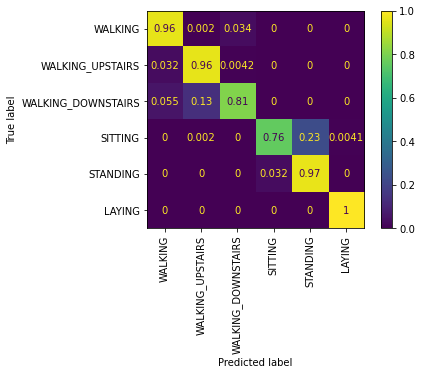

In [44]:
# NOTE: Fill all variables here with default values of the plot_confusion_matrix
display_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
                  'SITTING', 'STANDING', 'LAYING']
plot_confusion_matrix(y_test_str, pred_test, display_labels=display_labels)

In [52]:
quantile_based_results = gs_model2.sort_values(['addressSize', 'bleachingActivated', 'thermometer_size']).reset_index(drop=True)['validation_accuracy_mean'].values
old_method_results = gs_model1.sort_values(['addressSize', 'bleachingActivated', 'thermometer_size']).reset_index(drop=True)['validation_accuracy_mean'].values

(quantile_based_results > old_method_results).mean()

0.7975206611570248

In [56]:
(quantile_based_results - old_method_results)[quantile_based_results < old_method_results].mean()

-0.0044276834195435206